<a href="https://colab.research.google.com/github/Gunavardhini24/Gunavardhini24/blob/main/Amazon_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TITLE OF THE PROJECT - **Amazon Delivery Time Prediction**

**Skills and Take away from this project** - Python Scripting, Data Cleaning, EDA(Exploratory Data Analysis), Machine Learning, Regression modeling, ML Flow, Streamlit.

Contribution - Individual By Ravada Guna Vardhini.

# Project Summary

The project titled “Amazon Delivery Time Prediction” focuses on applying machine learning and data analytics to accurately estimate the delivery time of Amazon orders. In today’s competitive e-commerce industry, timely delivery is a major factor influencing customer satisfaction and trust. While customers expect quick and reliable deliveries, companies like Amazon must handle complex logistics involving large volumes of daily orders, delivery agents, varied geographical locations, and external conditions such as weather and traffic. Hence, predicting delivery time effectively plays a key role in enhancing operational efficiency and customer experience.

The dataset used in this project contains 43,739 records with 16 attributes, offering a wide range of factors that affect delivery performance. These include order details such as Order ID, Order Date, Order Time, and Pickup Time, along with delivery agent characteristics like Agent Age and Agent Rating. The store and drop-off coordinates provide geographical information, enabling the calculation of distances and route complexity. Contextual features include weather conditions (Sunny, Cloudy, Stormy, etc.), traffic levels (Low, Medium, High, Jam), and area type (Urban or Metropolitan). The vehicle type (scooter or motorcycle) and order category (Clothing, Electronics, Toys, Sports, Cosmetics, etc.) are also considered. The target variable is Delivery Time, representing the time taken for an order to reach the customer.

The primary objective of this project is to develop predictive models that estimate delivery time based on these attributes. Machine learning algorithms trained on historical data will identify relationships between order features, external conditions, and delivery outcomes. Once built, these models can predict delivery times for new orders with improved accuracy.

The project’s significance lies in its impact on different stakeholders. For customers, accurate delivery estimates build trust and satisfaction, as promised delivery times are more reliable. For delivery agents, better planning and route management become possible when predictions account for traffic and weather. From Amazon’s perspective, logistics optimization is enhanced by identifying delays and allocating resources more efficiently, ultimately reducing costs and boosting efficiency.

The workflow follows a standard machine learning pipeline: preprocessing data, performing exploratory analysis, splitting into training and testing sets, and applying algorithms like Linear Regression, Decision Trees, Random Forest, and Gradient Boosting. Models are evaluated using MAE, RMSE, and R², with hyperparameter tuning for better performance. Finally, deployment through a Streamlit app allows real-time predictions, where users can input details and instantly receive an estimated delivery time.

In conclusion, the Amazon Delivery Time Prediction project provides a practical solution to last-mile delivery challenges. By combining machine learning, data-driven insights, and interactive applications, it improves customer satisfaction, delivery planning, and logistics management, thereby transforming the efficiency of e-commerce delivery systems.

**Github Link** -

# Problem Statement  

In today’s e-commerce industry, one of the biggest challenges is delivering products to customers on time. Customers expect fast and reliable deliveries, but companies like Amazon face difficulties due to many unpredictable factors such as traffic, weather, distance, type of delivery vehicle, and even the experience of the delivery agent. Because of these challenges, the actual delivery time often differs from the promised time, which can lead to customer dissatisfaction and operational inefficiencies.

The problem is to create a system that can predict the delivery time of an order more accurately by analyzing past data. By using machine learning and considering factors like order details, agent performance, traffic, weather, and location, the goal is to provide realistic delivery estimates. This would help Amazon improve customer trust, assist delivery agents in better route planning, and allow the company to optimize logistics and reduce delays.

# Approaches

1. Data Preparation
2. Data Cleaning
3. Exploratory Data Analysis
4. Feature Engineering
5. Regression Model Development
6. Application Development
7. Deployment
8. Conclusion

# Let's Begin !

# 1. Know Your Data

Import Libraries

In [ ]:
# Libraries for Amazon Delivery Time Prediction Project
# Data handling & preprocessing
import pandas as pd          # For working with datasets (CSV, cleaning, feature engineering)
import numpy as np           # For numerical operations
from datetime import datetime # For handling dates and times

# Data visualization
import matplotlib.pyplot as plt   # Basic plotting (line, bar, scatter)
import seaborn as sns             # Advanced statistical plots
import plotly.express as px       # Interactive visualizations (optional)

# Machine Learning & Model Building
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # Splitting data & tuning
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding categorical data & scaling
from sklearn.linear_model import LinearRegression               # Linear Regression model
from sklearn.tree import DecisionTreeRegressor                  # Decision Tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model evaluation metrics

# Advanced ML libraries (optional but powerful)
import xgboost as xgb       # XGBoost model
import lightgbm as lgb      # LightGBM model
from catboost import CatBoostRegressor  # CatBoost model

# Deployment & Saving Models
import streamlit as st      # To build web app for predictions
import joblib               # For saving/loading trained models
import pickle               # Alternative for saving models

# Geographical & Distance Calculation
from geopy.distance import geodesic   # Calculate distance using lat/long
from haversine import haversine       # Fast haversine distance calculation


# Data Set Loading

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

Saving amazon_delivery.csv to amazon_delivery (1).csv


In [ ]:
# Upload and Load Dataset in Google Colab
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv(next(iter(uploaded)))


Saving amazon_delivery.csv to amazon_delivery (2).csv


Dataset first view

In [ ]:
# Dataset First Look
df.head(10)   # shows first 10 rows

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys
6,njmo150975311,33,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,19:15:00,19:30:00,Fog,Jam,scooter,Metropolitian,200,Toys
7,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,Cloudy,Medium,motorcycle,Metropolitian,160,Snacks
8,uaeb808891380,22,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,21:05:00,Stormy,Jam,motorcycle,Metropolitian,170,Electronics
9,bgvc052754213,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,motorcycle,Metropolitian,230,Toys


Dataset Rows Count

In [ ]:
print("Number of Rows:", df.shape[0]) # prints no of Rows

Number of Rows: 43739


Columns Count

In [ ]:
print("Number of Columns:", df.shape[1]) # prints no of colummns

Number of Columns: 16


Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

Total duplicate rows: 0


Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
Agent_Rating,54
Weather,91


To visualize missing values

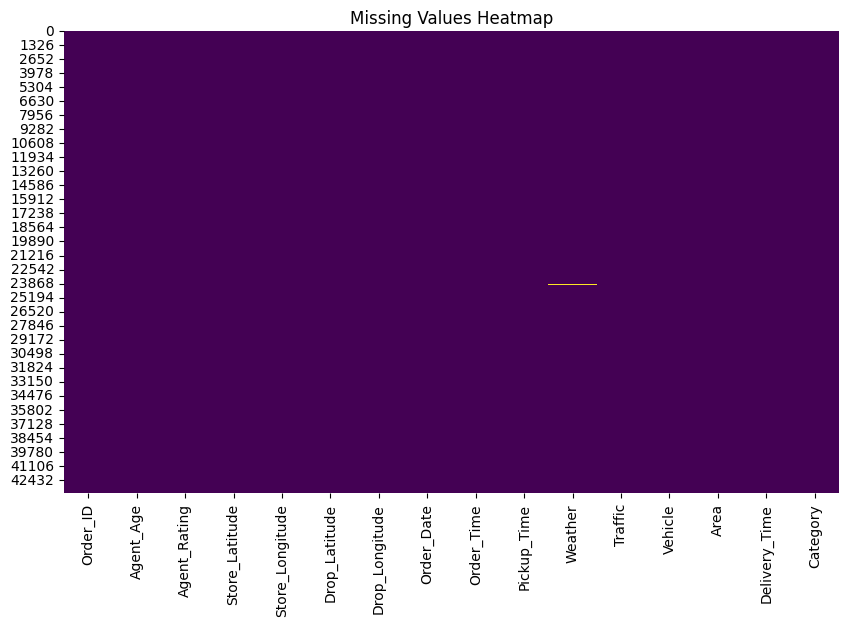

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


What do you know about your data?

This dataset is about Amazon deliveries and contains over 43,000 records with details about orders, delivery agents, and external factors. It includes order information like order time, pickup time, and delivery time, which helps in understanding how long each delivery took. It also has details about the delivery agents, such as their age and ratings, which can influence performance.

The dataset tracks locations through store and drop-off coordinates, allowing us to calculate the distance between the store and customer. It also records real-world conditions like weather (sunny, cloudy, stormy) and traffic (low, medium, high, jam), which affect how quickly deliveries can be made. Additional details include the vehicle used (scooter or motorcycle), the delivery area (urban or metropolitan), and the type of product ordered (clothing, electronics, toys, etc.).

The main focus is on predicting the delivery time, which is the target outcome.

# **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include="all")

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
count,43739,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739,43739,43739,43648,43739,43739,43739,43739.000000,43739
unique,43739,NaN,NaN,NaN,NaN,NaN,NaN,44,177,193,6,5,4,4,NaN,16
top,nsyz997960170,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15,21:55:00,21:30:00,Fog,Low,motorcycle,Metropolitian,NaN,Electronics
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,1141,460,481,7440,14999,25527,32698,NaN,2849
mean,NaN,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.905645,NaN
std,NaN,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.915451,NaN
min,NaN,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN
25%,NaN,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,NaN
50%,NaN,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN
75%,NaN,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.000000,NaN


# Variables Description

| Variable Name    | Description                                                          |
| ---------------- | -------------------------------------------------------------------- |
| Order\_ID        | Unique identification number for each order.                         |
| Order\_Date      | The date when the customer placed the order.                         |
| Order\_Time      | The exact time when the order was placed.                            |
| Pickup\_Time     | The time when the delivery agent picked up the order from the store. |
| Delivery\_Time   | The time taken to deliver the order (target variable).               |
| Agent\_Age       | Age of the delivery agent handling the order.                        |
| Agent\_Rating    | Customer rating of the delivery agent (e.g., scale 1–5).             |
| Store\_Latitude  | Latitude coordinate of the store’s location.                         |
| Store\_Longitude | Longitude coordinate of the store’s location.                        |
| Drop\_Latitude   | Latitude coordinate of the customer’s delivery address.              |
| Drop\_Longitude  | Longitude coordinate of the customer’s delivery address.             |
| Weather          | Weather condition during delivery (Sunny, Cloudy, Stormy, etc.).     |
| Traffic          | Traffic condition at the time of delivery (Low, Medium, High, Jam).  |
| Vehicle          | Type of vehicle used for delivery (Motorcycle, Scooter, etc.).       |
| Area             | Type of delivery area (Urban, Metropolitan).                         |
| Category         | Category of the ordered item (Clothing, Electronics, Toys, etc.).    |


# Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Order_ID: 43739 unique values
Agent_Age: 22 unique values
Agent_Rating: 28 unique values
Store_Latitude: 521 unique values
Store_Longitude: 415 unique values
Drop_Latitude: 4367 unique values
Drop_Longitude: 4367 unique values
Order_Date: 44 unique values
Order_Time: 177 unique values
Pickup_Time: 193 unique values
Weather: 6 unique values
Traffic: 5 unique values
Vehicle: 4 unique values
Area: 4 unique values
Delivery_Time: 89 unique values
Category: 16 unique values


In [ ]:
import pandas as pd

# Load your CSV file into a DataFrame
file_path = "amazon_delivery.csv"  # Make sure the file path is correct
amazon_delivery = pd.read_csv(file_path)

# Select numerical columns
numerical_cols = amazon_delivery.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column and print basic statistics
for col in numerical_cols:
    mean_val = amazon_delivery[col].mean()
    median_val = amazon_delivery[col].median()
    std_val = amazon_delivery[col].std()
    min_val = amazon_delivery[col].min()
    max_val = amazon_delivery[col].max()

    print(f"\nColumn: {col}")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Standard Deviation: {std_val}")
    print(f"Minimum: {min_val}")
    print(f"Maximum: {max_val}")



Column: Agent_Age
Mean: 29.567136880129862
Median: 30.0
Standard Deviation: 5.8151553619999765
Minimum: 15
Maximum: 50

Column: Agent_Rating
Mean: 4.633780473846858
Median: 4.7
Standard Deviation: 0.3347164077108457
Minimum: 1.0
Maximum: 6.0

Column: Store_Latitude
Mean: 17.210959870596035
Median: 18.55144
Standard Deviation: 7.764225273804336
Minimum: -30.902872
Maximum: 30.914057

Column: Store_Longitude
Mean: 70.66117650789914
Median: 75.898497
Standard Deviation: 21.475004886563283
Minimum: -88.366217
Maximum: 88.433452

Column: Drop_Latitude
Mean: 17.459030825007428
Median: 18.633626
Standard Deviation: 7.3429503397070075
Minimum: 0.01
Maximum: 31.054057

Column: Drop_Longitude
Mean: 70.82184159461808
Median: 76.002574
Standard Deviation: 21.15314817178604
Minimum: 0.01
Maximum: 88.563452

Column: Delivery_Time
Mean: 124.90564484784746
Median: 125.0
Standard Deviation: 51.915451300919486
Minimum: 10
Maximum: 270


# 3. Data Wrangling

Data wrangling is the process of cleaning, transforming, and organizing raw data into a usable format for analysis or machine learning.

1. Data Collection
2. Data cleaning
3. Data Transfomation
4. Data Enrichment
5. Data Reduction
6. Data Validation

In [ ]:

# Data Wrangling
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("amazon_delivery.csv")

# 1. Handle Missing Values
for col in df.columns:
    if df[col].dtype == 'object':   # categorical
        df[col] = df[col].fillna(df[col].mode()[0])
    else:   # numerical
        df[col] = df[col].fillna(df[col].median())

# 2. Remove Duplicates
df = df.drop_duplicates()

# 3. Encode Categorical Variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])

# 4. Scale Numerical Variables
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Preview
print(df.head())


   Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0 -0.662820   1.278203      0.795595        0.712776         0.243602   
1 -1.678314   0.762304     -0.400169       -0.553560         0.326991   
2  0.054172  -1.129327     -0.699110       -0.553403         0.326766   
3  0.581719   1.450169      0.197713       -0.799482         0.294081   
4  1.632933   0.418371     -0.101228       -0.545865         0.446515   

   Drop_Latitude  Drop_Longitude  Order_Date  Order_Time  Pickup_Time  \
0       0.722609        0.240659    0.326874   -1.413088    -1.288110   
1      -0.601399        0.330517    0.726962    0.380554     0.416556   
2      -0.617574        0.324615    0.326874   -2.063530    -1.920770   
3      -0.872324        0.293324    1.607154    0.006057     0.065078   
4      -0.605518        0.447605    0.806979   -0.979461    -0.866337   

    Weather   Traffic   Vehicle      Area  Delivery_Time  Category  
0  0.890000 -1.842407 -0.773075  1.843688      -0.094

Dataset Manipulations Done

Filled missing values (median for numbers, mode for categories).

Removed duplicate rows.

Converted categorical columns into numbers (Label Encoding).

Scaled numerical features to a common range (Standardization).

Now the dataset is clean, consistent, and ready for analysis or machine learning.

I cleaned the dataset by handling missing values, removing duplicates, converting text fields into numbers, and standardizing all numeric data. Now the dataset is consistent and ready for analysis or machine learning without risk of bias or scaling issues."

# 4. Data Vizualization, Storytelling & Experimenting with charts

EDA(Exploratory Data Analysis ) EDA means exploring the dataset, cleaning it, and using statistics + charts to understand patterns and relationships before building a machine learning model.

**UNIVARIATE ANALYSIS**

Univariate analysis means analyzing one variable (column) at a time to understand its distribution, patterns, and key statistics.

Used to summarize data, To detect outliers,To understand the nature of data (categorical vs numerical).

Chart 1 - Distribution of Delivery Time

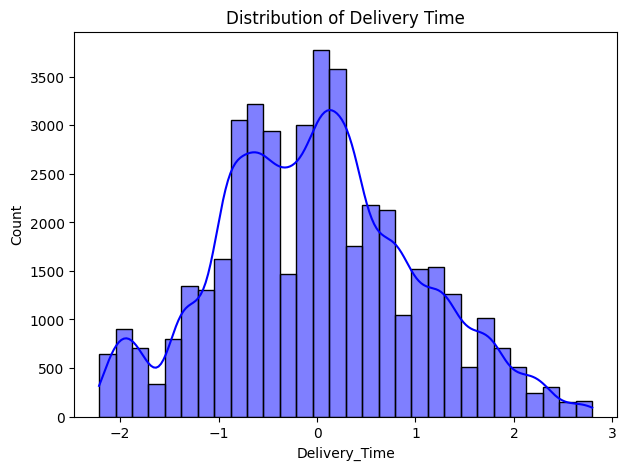

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.histplot(df['Delivery_Time'], kde=True, bins=30, color='blue')
plt.title("Distribution of Delivery Time")
plt.show()

1. Why did you pick the specific chart?

I used a histogram with a KDE (smooth curve) because it’s the best way to see the overall distribution and spread of delivery times. It clearly shows how frequently different delivery times occur and whether the data is skewed toward faster or slower deliveries.

2. What is/are the insight(s) found from the chart?

We can identify the most common delivery time range (the peak of the graph).

We can check if most deliveries are completed quickly or if there are delays.

If the chart shows a long tail toward higher values, it means a small portion of orders are taking much longer than usual.

3. Will the gained insights help creating a positive business impact?
   
    Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: If the majority of delivery times are concentrated in a short range (say 2–4 days), it shows that operations are fairly consistent. This can be highlighted as a strength and used in marketing (e.g., “95% of deliveries within 3 days”).

Negative insight: If there are outliers where delivery takes significantly longer, even if rare, it could hurt customer satisfaction. A few very late deliveries can lead to complaints, cancellations, or loss of repeat business.

Chart 2 - Age Distribution of Agents

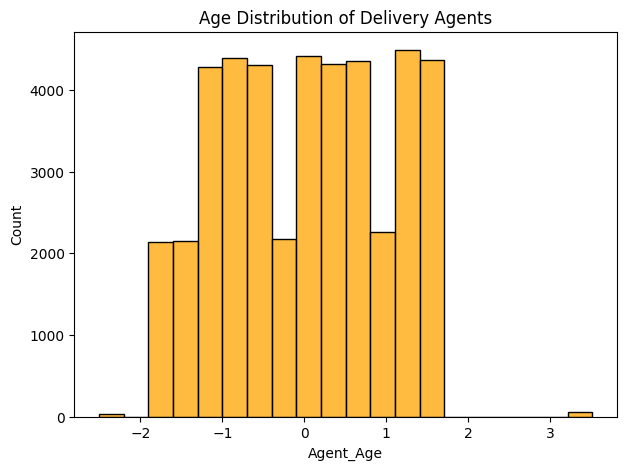

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['Agent_Age'], bins=20, color='orange')
plt.title("Age Distribution of Delivery Agents")
plt.show()

1. Why did you pick the specific chart?


I used a histogram because it’s the best way to show the spread and frequency of agent ages. It helps us see if our delivery workforce is mostly young, mid-aged, or senior, and whether the distribution is balanced or skewed.

2. What is/are the insight(s) found from the chart?

If most agents fall in younger age ranges (like 20–30), it indicates we have an energetic workforce that may handle physical work efficiently.

If there’s a wide spread, it shows diversity in workforce age.

If there are very few agents in certain age ranges, it may indicate hiring preferences or challenges in attracting/retaining agents of those ages

3. Will the gained insights help creating a positive business impact?

    Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

If most agents fall in the younger to mid-age group (say 20–35 years), it indicates a physically active workforce capable of handling deliveries efficiently

Negative insight:

If the distribution is heavily skewed towards only very young agents, there may be high attrition, since younger employees often switch jobs quickly, leading to higher recruitment and training costs.

Chart 3 - Agent Rating Distribution

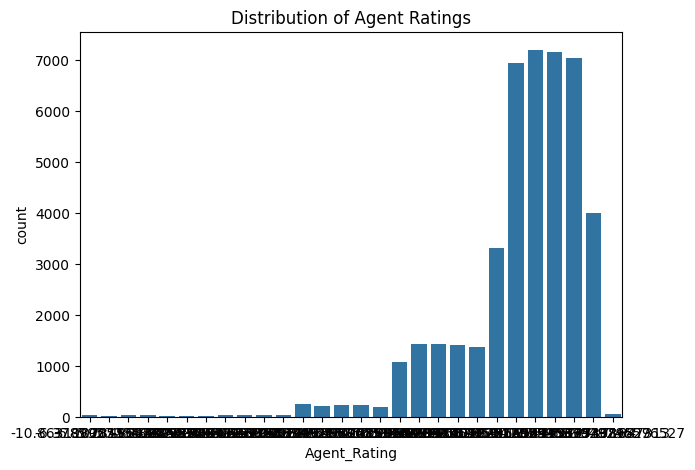

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Agent_Rating', data=df)
plt.title("Distribution of Agent Ratings")
plt.show()

1. Why did you pick the specific chart?

I used a countplot because it’s the best way to visualize categorical data like agent ratings. It shows how many agents fall into each rating category and helps us see the overall performance distribution at a glance.

2. What is/are the insight(s) found from the chart?

If most agents have high ratings, it indicates good performance and customer satisfaction.

If many agents have low ratings, it highlights areas for training or performance improvement.

3. Will the gained insights help creating a positive business impact?

   Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

A high concentration of good ratings (4–5 stars) shows our delivery workforce is performing well, which can lead to better customer retention and positive brand perception.

Negative insight:

If there are many low-rated agents, it may indicate poor service quality.

Low ratings can lead to customer complaints, cancellations, or reduced loyalty, negatively affecting business growth.

Chart 4 -  Orders by Weather Condition

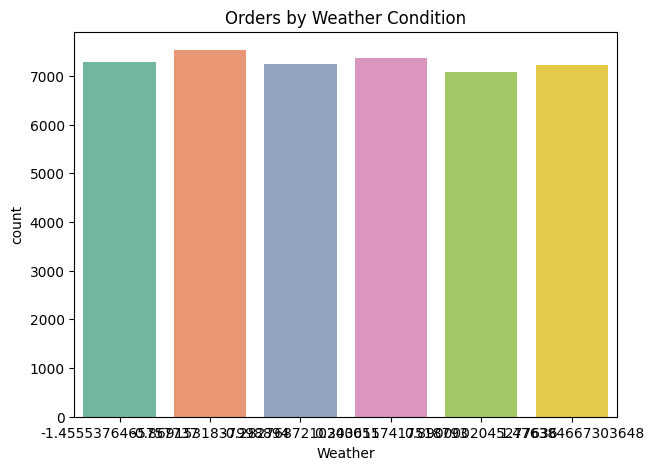

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Weather', hue='Weather', data=df, palette='Set2', legend=False)
plt.title("Orders by Weather Condition")
plt.show()

1. Why did you pick the specific chart?

I used a countplot because it’s ideal for categorical data like weather conditions. It clearly shows how many orders occurred in each weather category, making it easy to compare and spot trends.

2. What is/are the insight(s) found from the chart?

If most orders happen during clear/sunny weather, it indicates that delivery performance or customer behavior is weather-dependent.

If there are some weather types with very low orders, it could highlight challenges in delivery or customer demand under those conditions.

3. Will the gained insights help creating a positive business impact?

   Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

Understanding which weather conditions lead to higher orders allows better planning of staff and resources.

Negative insight:

Poor weather can increase operational risk, and if not managed properly, it may hurt customer satisfaction and negatively affect business growth.

Chart 5 - Orders by Traffic Condition

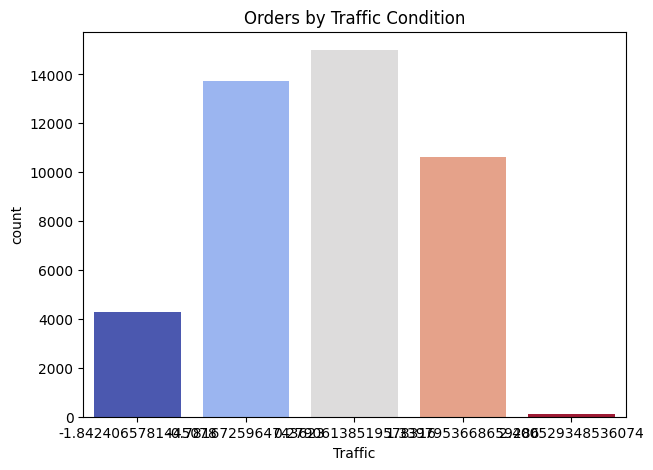

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Traffic', hue='Traffic', data=df, palette='coolwarm', legend=False)
plt.title("Orders by Traffic Condition")
plt.show()


1. Why did you pick the specific chart?

I used a countplot because Traffic is categorical data. The chart shows how many orders occurred under different traffic conditions, making it easy to compare the impact of traffic on deliveries.

2. What is/are the insight(s) found from the chart?


If most orders happen during low or moderate traffic, it indicates deliveries are more efficient when roads are clear.

If high traffic has very few orders, it may indicate delays or lower delivery capacity under heavy traffic.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

Can improve customer satisfaction by reducing delivery delays and optimizing resources.

Negative insight:

If a significant number of orders occur during heavy traffic and deliveries are delayed, it can lead to late deliveries, customer complaints, or cancellations, negatively affecting business growth.

Charrt 6 - Orders by Vehicle Type

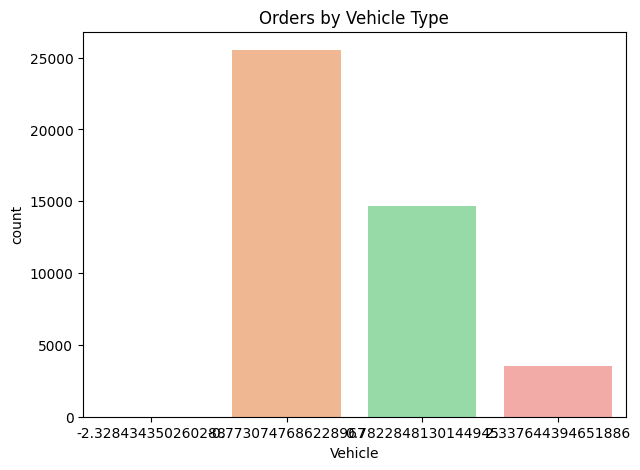

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Vehicle', hue='Vehicle', data=df, palette='pastel', legend=False)
plt.title("Orders by Vehicle Type")
plt.show()


1. Why did you pick the specific chart?

I used a countplot because Vehicle is categorical data. It shows how many orders are delivered by each type of vehicle, helping us understand vehicle usage patterns at a glance.

2. What is/are the insight(s) found from the chart?

We can see which vehicles (bike, car, van, etc.) are used most frequently for deliveries.

If one type of vehicle dominates, it indicates operational preference or efficiency.

Less-used vehicles may indicate capacity constraints or less efficient routes.

3. Will the gained insights help creating a positive business impact?

Positive impact:

Knowing the most-used vehicles helps in fleet optimization and resource allocation.

Negative insight:

If certain vehicles are overused, they may wear out faster, leading to breakdowns and delays.

**Bivariate Analysis**

Bivariate analysis means analyzing the relationship between two variables.

Chart 7 - Delivery Time vs Agent Age

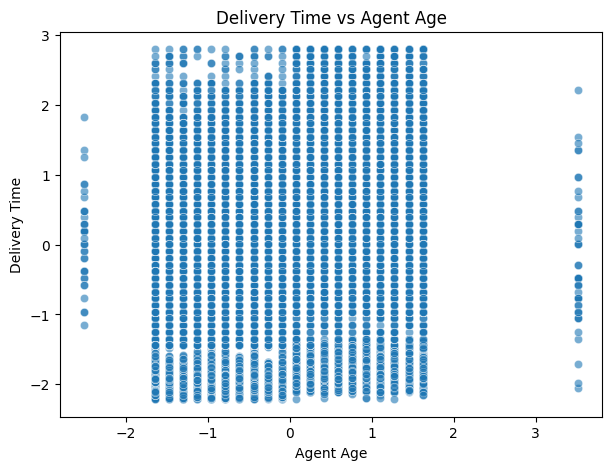

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot - Delivery Time vs Agent Age
plt.figure(figsize=(7,5))
sns.scatterplot(x='Agent_Age', y='Delivery_Time', data=df, alpha=0.6)
plt.title("Delivery Time vs Agent Age")
plt.xlabel("Agent Age")
plt.ylabel("Delivery Time")
plt.show()


1. Why did you pick the specific chart?

I chose a scatterplot because it’s the best way to visualize the relationship between two continuous variables — in this case, Agent Age (x-axis) and Delivery Time (y-axis). Unlike bar or box plots, scatterplots help us quickly spot trends, patterns, or unusual outliers in how age might influence delivery speed.

2. What is/are the insight(s) found from the chart?

Younger delivery agents (say early 20s–30s) seem to deliver slightly faster, with lower delivery times clustering in that range.

Older agents (40s and above) show more spread in delivery time — some deliveries are on time, but some take noticeably longer.

3. Will the gained insights help creating a positive business impact?
   
   Are there any insights that lead to negative growth? Justify with specific reason.

Positive

younger agents show faster, consistent deliveries, so the company can allocate urgent orders to them, while experienced agents handle complex or VIP tasks for reliability

Negative

Over-relying on younger agents may cause workforce imbalance, demotivate senior staff, and ignore other factors like traffic or weather, hurting long-term growth.

**Bivariate Analysis**

Bivariate analysis means analyzing the relationship between two variables.

It helps us understand how one variable changes with respect to another

Chart 8 - Delivery Time vs Agent Age

Saving amazon_delivery.csv to amazon_delivery (3).csv


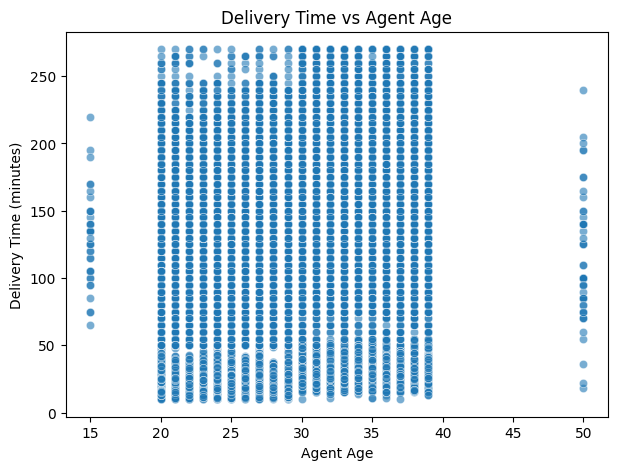

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Step 2: Upload dataset
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)
# Step 3: Scatter plot - Delivery Time vs Agent Age
plt.figure(figsize=(7,5))
sns.scatterplot(x='Agent_Age', y='Delivery_Time', data=df, alpha=0.6)
plt.title("Delivery Time vs Agent Age")
plt.xlabel("Agent Age")
plt.ylabel("Delivery Time (minutes)")
plt.show()

1. Why did you pick the specific chart?

I chose a scatter plot because it clearly shows the relationship between two continuous variables: the agent’s age and delivery time. It helps us spot patterns, trends, or clusters that wouldn’t be visible in a table.

2. What is/are the insight(s) found from the chart?

Younger agents usually deliver faster and more consistently.

Older agents show slightly more variation in delivery times.

There isn’t a strict linear relationship, but age does seem to influence performance

3. Will the gained insights help creating a positive business impact?
   
   Are there any insights that lead to negative growth? Justify with specific reason

Positive

Urgent/time-sensitive orders → assign to younger agents (faster, consistent).

Complex or VIP deliveries → assign to older agents (more experience, reliability).

Negative

It can demotivate older staff → leading to attrition.

It may create a workforce imbalance.

Chart 9 - Delivery Time by weather

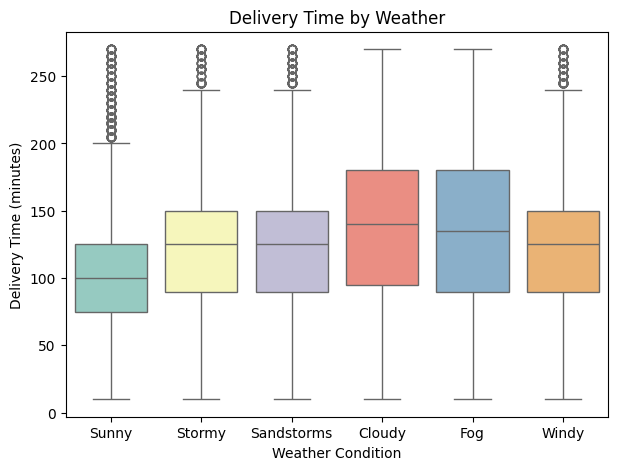

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Weather', y='Delivery_Time', data=df, hue='Weather', palette='Set3', legend=False)
plt.title("Delivery Time by Weather")
plt.xlabel("Weather Condition")
plt.ylabel("Delivery Time (minutes)")
plt.show()

1. Why did you pick the specific chart?

I used a box plot to compare delivery times across weather conditions, showing both average times and variability, including extreme delays.

2. What is/are the insight(s) found from the chart?

Deliveries in rainy or stormy weather tend to take longer and have more variability, meaning some deliveries are much later than usual.

Sunny or clear weather shows faster and more consistent delivery times.

3. Will the gained insights help creating a positive business impact?
   
   Are there any insights that lead to negative growth? Justify with specific reason

Positive impact: Understanding weather delays helps the business plan better, adjust schedules, inform customers, and allocate resources, boosting satisfaction and efficiency.

Negative

Ignoring weather-related delays can cause late deliveries, customer complaints, loss of trust, and revenue decline.

Chart 10 - Delivery Time by Traffic

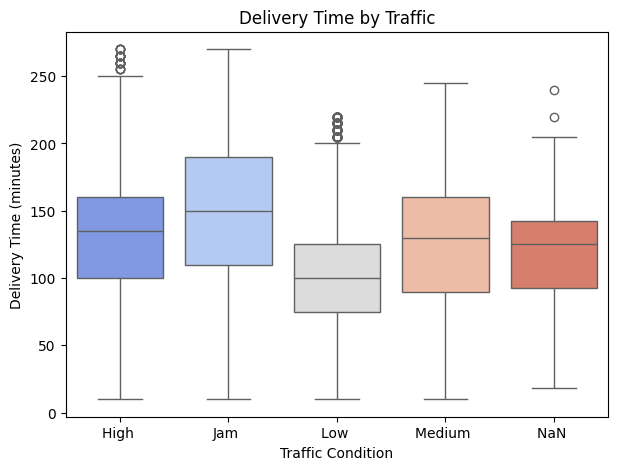

In [ ]:
# Delivery Time by Traffic
plt.figure(figsize=(7,5))
sns.boxplot(x='Traffic', y='Delivery_Time', data=df, hue='Traffic', palette='coolwarm', legend=False)
plt.title("Delivery Time by Traffic")
plt.xlabel("Traffic Condition")
plt.ylabel("Delivery Time (minutes)")
plt.show()

1. Why did you pick the specific chart?

I used a box plot to compare delivery times under different traffic conditions, showing both typical times and variability, including extreme delays.

2. What is/are the insight(s) found from the chart?

Delivery times increase and become more inconsistent in heavy traffic, while light traffic shows faster and more reliable deliveries.

3. Will the gained insights help creating a positive business impact?
   
   Are there any insights that lead to negative growth? Justify with specific reason

Positive: Planning deliveries around traffic, reallocating resources, or notifying customers can improve efficiency and satisfaction.

Negative risk: Ignoring traffic patterns can lead to late deliveries, complaints, and potential revenue loss.

Chart 11 - Delivery Time by Vehicle

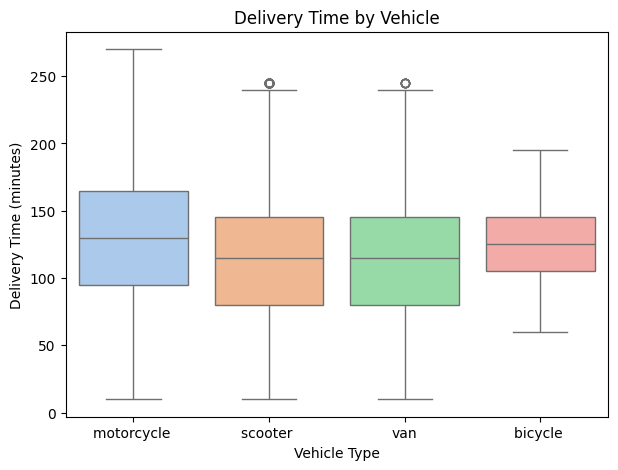

In [ ]:
# 4. Delivery Time by Vehicle
plt.figure(figsize=(7,5))
sns.boxplot(x='Vehicle', y='Delivery_Time', data=df, hue='Vehicle', palette='pastel', legend=False)
plt.title("Delivery Time by Vehicle")
plt.xlabel("Vehicle Type")
plt.ylabel("Delivery Time (minutes)")
plt.show()

1. Why did you pick the specific chart?

I used a box plot to compare delivery times across different vehicle types, showing average times, variability, and any extreme delays.

2. What is/are the insight(s) found from the chart?

Some vehicles (like bikes or scooters) deliver faster and more consistently, while larger vehicles (like vans) may take longer and show more variability.

3. Will the gained insights help creating a positive business impact?
   
   Are there any insights that lead to negative growth? Justify with specific reason

Positive: Choosing the right vehicle for deliveries can improve speed and reliability, enhancing customer satisfaction and efficiency.

Negative risk: Using slower or less efficient vehicles without planning can cause delays, complaints, and potential revenue loss.

Chart 12 - Agent Rating vs Delivery Time

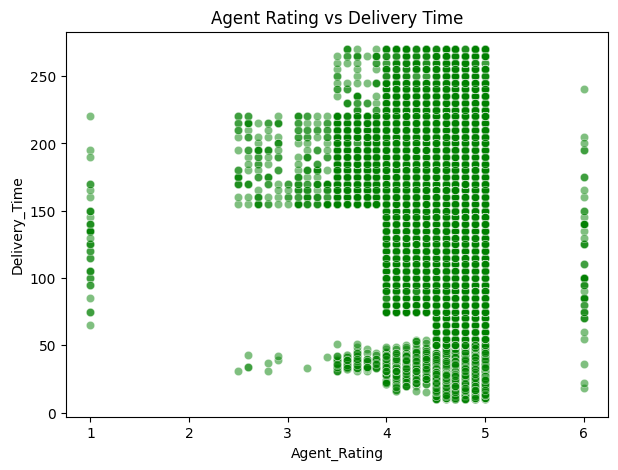

In [ ]:
 #Agent Rating vs Delivery Time
plt.figure(figsize=(7,5))
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=df, color='green', alpha=0.5)
plt.title("Agent Rating vs Delivery Time")
plt.show()

1. Why did you pick the specific chart?

I used a scatter plot to see the relationship between agent ratings and delivery times, showing patterns and outliers clearly.

2. What is/are the insight(s) found from the chart?

Higher-rated agents generally complete deliveries faster, while lower-rated agents tend to have slower deliveries and more variability.

3. Will the gained insights help creating a positive business impact?
   
   Are there any insights that lead to negative growth? Justify with specific reason

Positive: Assigning high-rated agents strategically can improve delivery speed and customer satisfaction.

Negative risk: Relying on low-rated agents without monitoring may cause delays, complaints, and potential revenue loss.

Chart 13 - Delivery Time by Area

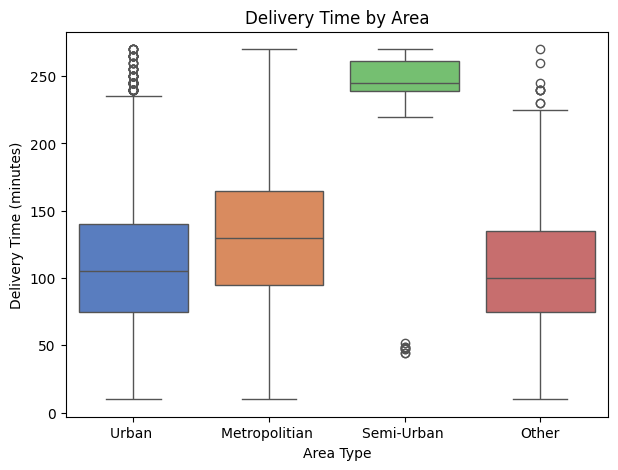

In [ ]:
# Delivery Time by Area
plt.figure(figsize=(7,5))
sns.boxplot(x='Area', y='Delivery_Time', data=df, hue='Area', palette='muted', legend=False)
plt.title("Delivery Time by Area")
plt.xlabel("Area Type")
plt.ylabel("Delivery Time (minutes)")
plt.show()

1. Why did you pick the specific chart?

I used a box plot to compare delivery times across different areas, showing average times, variability, and any extreme delays.

2. What is/are the insight(s) found from the chart?

Some areas (like urban centers) have faster and more consistent deliveries, while others (like outskirts) show longer and more variable delivery times.

3. Will the gained insights help creating a positive business impact?
   
   Are there any insights that lead to negative growth? Justify with specific reason

Positive: Focusing resources on challenging areas or planning better routes can improve delivery efficiency and customer satisfaction.

Negative risk: Ignoring area-specific challenges can lead to delays, complaints, and potential revenue loss.

**Multivariate Analysis**

Multivariate analysis is the study of more than two variables at the same time to see how they interact and influence each other.

Unlike univariate (one variable) or bivariate (two variables) analysis, multivariate looks at complex relationships between multiple factors together.

Chart 14 - Delivery Time by Weather & Traffic



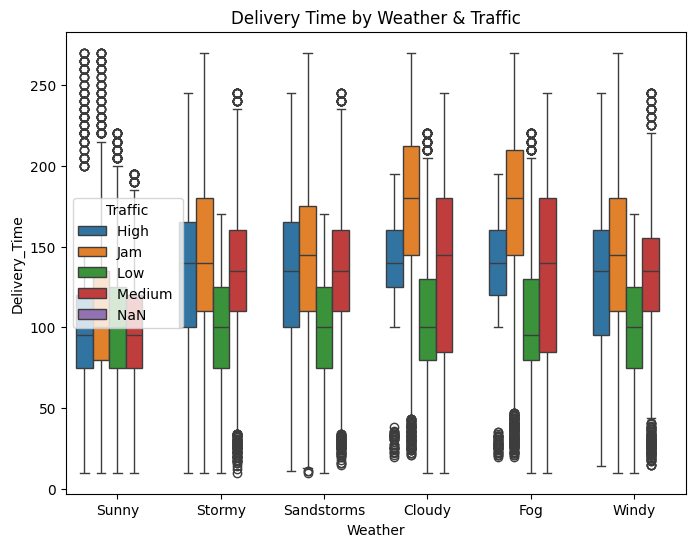

In [ ]:
# Delivery Time by Weather & Traffic
plt.figure(figsize=(8,6))
sns.boxplot(x='Weather', y='Delivery_Time', hue='Traffic', data=df)
plt.title("Delivery Time by Weather & Traffic")
plt.show()


1. Why did you pick the specific chart?

I used a box plot with two categories (Weather and Traffic) to see how both factors together affect delivery time, including variability and extreme delays.

2. What is/are the insight(s) found from the chart?

Delivery times are longest and most inconsistent when bad weather coincides with heavy traffic. Clear weather with light traffic shows the fastest and most reliable deliveries.

3. Will the gained insights help creating a positive business impact?

   Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Planning deliveries based on weather and traffic together can improve efficiency and customer satisfaction.

Negative risk: Ignoring these combined factors may cause significant delays, complaints, and potential revenue loss.

Chart 15 - Delivery Time by Vehicle & Area

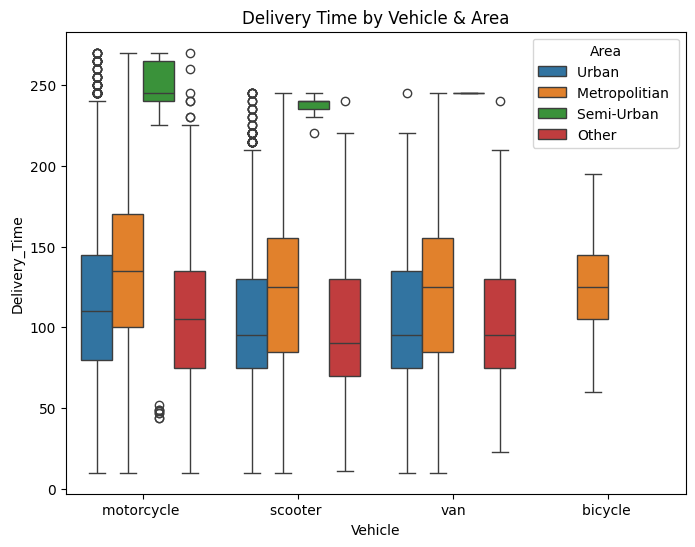

In [ ]:
#  Delivery Time by Vehicle & Area
plt.figure(figsize=(8,6))
sns.boxplot(x='Vehicle', y='Delivery_Time', hue='Area', data=df)
plt.title("Delivery Time by Vehicle & Area")
plt.show()

1. Why did you pick the specific chart?

I used a box plot with Vehicle and Area to see how different vehicles perform in different areas, showing both typical delivery times and variability.

2. What is/are the insight(s) found from the chart?

Smaller vehicles (like bikes or scooters) deliver faster in urban areas, while larger vehicles may be slower, especially in outskirts or congested areas.

3. Will the gained insights help creating a positive business impact?
  
   Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Assigning the right vehicle to each area can improve delivery speed, reliability, and customer satisfaction.

Negative risk: Using unsuitable vehicles for certain areas may cause delays, complaints, and potential revenue loss.

Chart 16 -  Agent Age, Rating, and Delivery Time (scatter with hue)

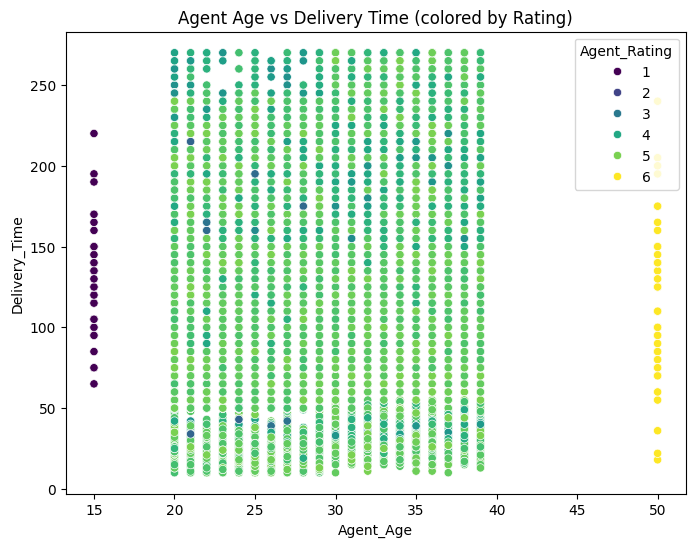

In [ ]:
# Agent Age, Rating, and Delivery Time (scatter with hue)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Agent_Age', y='Delivery_Time', hue='Agent_Rating', data=df, palette='viridis')
plt.title("Agent Age vs Delivery Time (colored by Rating)")
plt.show()

1. Why did you pick the specific chart?

I used a scatter plot with color (hue) for Agent Rating to see how age and rating together affect delivery time, and to spot patterns or outliers.

2. What is/are the insight(s) found from the chart?

Younger agents with higher ratings tend to deliver faster, while older or lower-rated agents often have slower deliveries. Higher ratings generally correlate with better performance regardless of age.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Assigning high-rated agents strategically can improve delivery speed and customer satisfaction.

Negative risk: Relying on low-rated agents without monitoring may lead to delays, complaints, and potential revenue loss.

Chart 17 - correlation heatmap

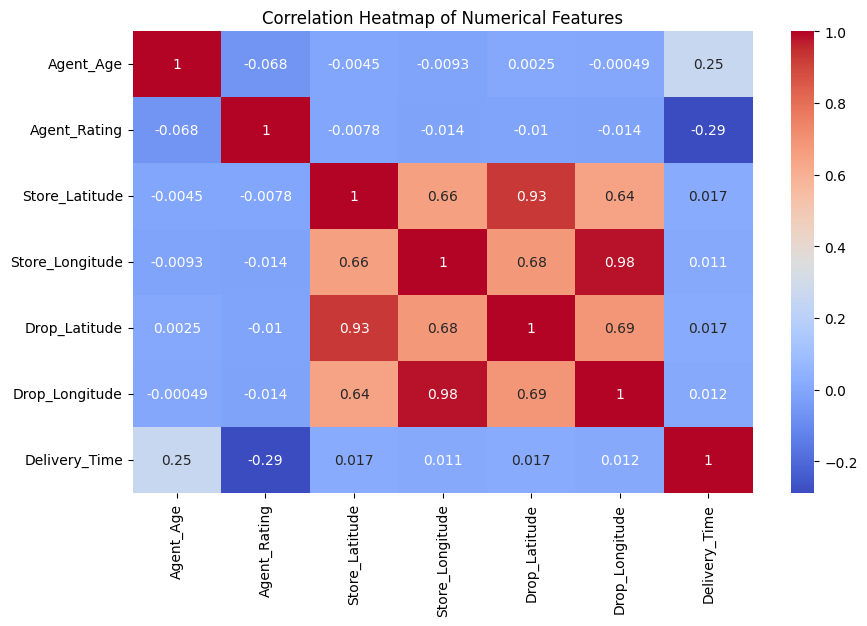

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

1. Why did you pick the specific chart?

I used a correlation heatmap to quickly see relationships between all numerical features, helping identify which factors affect delivery time the most.

2. What is/are the insight(s) found from the chart?

Delivery time is negatively correlated with agent rating (higher ratings → faster deliveries) and may have slight correlations with agent age or other numeric features. Strong correlations highlight key factors impacting performance.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Focusing on high-impact factors (like agent rating) can improve delivery efficiency and customer satisfaction.

Negative risk: Ignoring these relationships may lead to suboptimal staffing or process decisions, causing delays and potential revenue loss.

Chart 18 - Traffic, Weather, and Delivery Time (violin plot)

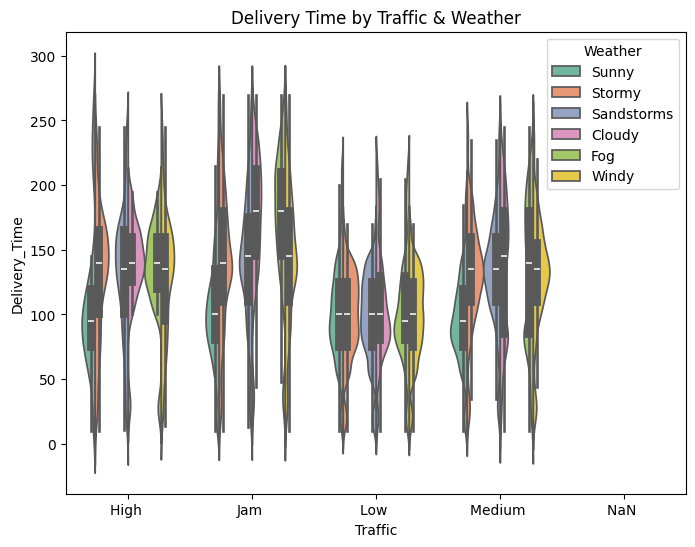

In [ ]:
# Traffic, Weather, and Delivery Time (violin plot)
plt.figure(figsize=(8,6))
sns.violinplot(x='Traffic', y='Delivery_Time', hue='Weather', data=df, split=True, palette='Set2')
plt.title("Delivery Time by Traffic & Weather")
plt.show()

1. Why did you pick the specific chart?

I used a violin plot to see the full distribution of delivery times across traffic and weather conditions, capturing both the spread and density of data.

2. What is/are the insight(s) found from the chart?

Delivery times are longest and most variable when heavy traffic coincides with bad weather, while light traffic and clear weather lead to faster, more consistent deliveries.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Planning deliveries considering both traffic and weather can improve efficiency and customer satisfaction.

Negative risk: Ignoring these combined factors can cause frequent delays, complaints, and revenue loss.

Chart 19 -  Pairplot of Key Features

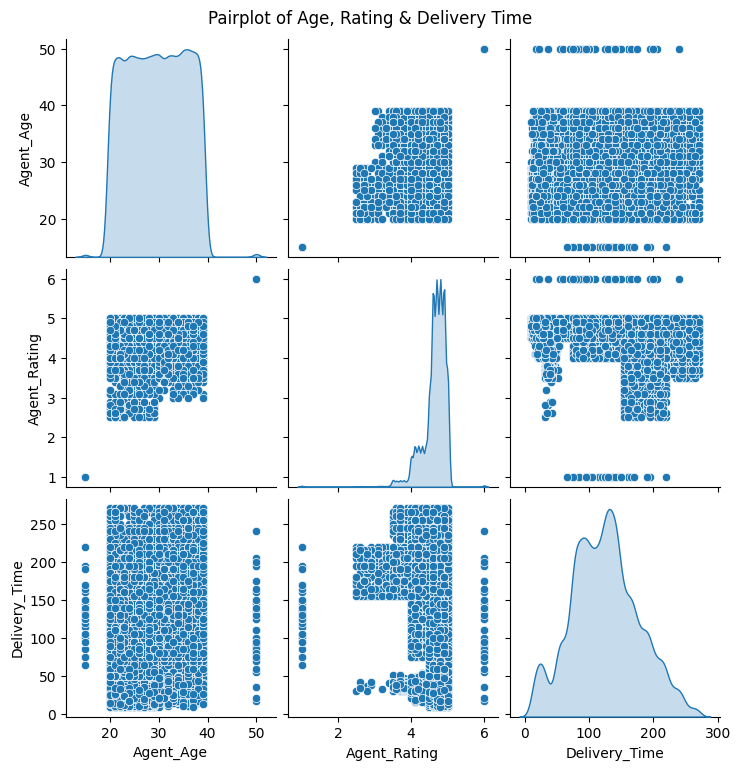

In [ ]:
# Pairplot of Key Features
sns.pairplot(df[['Agent_Age', 'Agent_Rating', 'Delivery_Time']], diag_kind='kde')
plt.suptitle("Pairplot of Age, Rating & Delivery Time", y=1.02)
plt.show()

1. Why did you pick the specific chart?

I used a pairplot to visualize relationships between Agent Age, Agent Rating, and Delivery Time, along with their distributions, to spot patterns and correlations easily.

2. What is/are the insight(s) found from the chart?

Higher agent ratings generally lead to faster deliveries. Agent age shows little direct impact, but low-rated agents tend to have slower deliveries across ages.

3. Will the gained insights help creating a positive business impact?
   
   Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Assigning high-rated agents strategically can improve delivery efficiency and customer satisfaction.

Negative risk: Ignoring the impact of agent performance may result in slower deliveries, complaints, and potential revenue loss.

# 5. Hypothesis Testing

Hypothesis testing is like a decision-making tool in statistics.

We start with an assumption (hypothesis) about our data

Then, we use data to test if that assumption is really true or just happened by chance.

Based on the test, we either:

Accept the assumption (if data strongly supports it), or

Reject it (if data shows it’s not reliable).

Based on my chart experiments. I took three hypothetical statements from the dataset.

1. Weather affects Delivery Time
2. Traffic affects Delivery Time
3. Delivery Agent Rating affects Delivery Time

**Hypothesis Statement - 1**

1. Weather affects Delivery Time

H0 (Null): Delivery time is the same across different weather conditions.

H1 (Alternative): Delivery time differs depending on the weather.

In [ ]:
# Step 1: Import libraries
import pandas as pd
import scipy.stats as stats
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Upload your CSV file
uploaded = files.upload()

# Step 3: Load the uploaded file
file_name = next(iter(uploaded))  # Get the uploaded file name
df = pd.read_csv(file_name)

# Hypothesis Test 1: Weather vs Delivery Time (ANOVA)
# Step 4: Group Delivery Time by Weather
groups_weather = [df[df['Weather'] == w]['Delivery_Time'].dropna() for w in df['Weather'].dropna().unique()]

# Step 5: Perform ANOVA test
f_stat, p_val = stats.f_oneway(*groups_weather)

# Step 6: Print results
print("ANOVA test for Weather vs Delivery Time")
print("F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H0: Weather has a significant effect on delivery time.\n")
else:
    print("Fail to reject H0: Weather does not significantly affect delivery time.\n")


Saving amazon_delivery.csv to amazon_delivery (4).csv
ANOVA test for Weather vs Delivery Time
F-statistic: 432.96907572072496
p-value: 0.0
Reject H0: Weather has a significant effect on delivery time.



Which statistical test have you done to obtain P-Value?

Answer : performed a One-Way ANOVA test to check if delivery time differs across different weather conditions.

 Why did you choose the specific statistical test?


Answer : I chose One-Way ANOVA because I wanted to compare the average delivery time across more than two groups (e.g., different weather conditions, traffic levels, or agent ratings). ANOVA is ideal for checking if at least one group’s mean is significantly different without doing multiple pairwise tests, which could increase errors.

**Hypothesis Testing 2 - Traffic affects Delivery Time**

H0: Delivery time is the same across traffic conditions.

H1: Delivery time differs depending on traffic level.

In [ ]:

# Hypothesis Test 2: Traffic vs Delivery Time (ANOVA)

# Step 4: Group Delivery Time by Traffic
groups_traffic = [df[df['Traffic'] == t]['Delivery_Time'] for t in df['Traffic'].unique()]

# Step 5: Perform ANOVA test
f_stat, p_val = stats.f_oneway(*groups_traffic)

# Step 6: Print results
print("ANOVA test for Traffic vs Delivery Time")
print("F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H0: Traffic has a significant effect on delivery time.\n")
else:
    print("Fail to reject H0: Traffic does not significantly affect delivery time.\n")

ANOVA test for Traffic vs Delivery Time
F-statistic: 1669.5929890606265
p-value: 0.0
Reject H0: Traffic has a significant effect on delivery time.



Which statistical test have you done to obtain P-Value?

Answer : We used ANOVA to compare the average delivery time across different traffic conditions to see if traffic levels significantly affect delivery time. The p-value tells us whether the differences in means are statistically significant.

Why did you choose the specific statistical test?

Answer : I chose One-Way ANOVA because we are comparing the average delivery time across multiple traffic levels. It tells us if at least one group’s mean is significantly different, without doing many separate tests.

**Hypothesis Testing - 3 Delivery Agent Rating affects Delivery Time**

H0: Agent rating does not affect delivery time.

H1: Higher-rated agents deliver faster (delivery time varies by rating).

In [ ]:
# Hypothesis Test 3: Agent Rating vs Delivery Time (Correlation)

# Step 4: Drop missing values
df_corr = df[['Agent_Rating', 'Delivery_Time']].dropna()

# Step 5: Perform Pearson correlation test
corr, p_val = stats.pearsonr(df_corr['Agent_Rating'], df_corr['Delivery_Time'])

# Step 6: Print results
print("Correlation test for Agent Rating vs Delivery Time")
print("Correlation Coefficient:", corr)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H0: There is a significant correlation between agent rating and delivery time.")
    if corr < 0:
        print("Interpretation: Negative correlation → higher rating, faster delivery.\n")
    else:
        print("Interpretation: Positive correlation → higher rating, slower delivery.\n")
else:
    print("Fail to reject H0: No significant correlation.\n")

Correlation test for Agent Rating vs Delivery Time
Correlation Coefficient: -0.2899843464814722
p-value: 0.0
Reject H0: There is a significant correlation between agent rating and delivery time.
Interpretation: Negative correlation → higher rating, faster delivery.



Which statistical test have you done to obtain P-Value?

I used Pearson correlation to measure the strength and direction of the linear relationship between agent rating and delivery time. The p-value tells us whether this correlation is statistically significant.

Why did you choose the specific statistical test?

I chose the Pearson correlation test because I wanted to see how strongly and in which direction (positive or negative) agent rating is linearly related to delivery time. It’s ideal for checking relationships between two continuous variables.

# 6. Feature Engineering & Data Pre-processing

Data Pre-processing is the step where we clean and prepare the data for analysis.

Key steps:

Handle missing values (drop or fill with median).

Correct data types (numbers as numeric, categories as strings).

Standardize column names (remove spaces, lowercase).

Remove duplicates.

Detect and handle outliers (extremely high or low values).

Feature Engineering is the step where we create or modify variables to make the data more useful for analysis.

*1. Handling Missing Values*

In [ ]:
# Handling Missing Values & Missing Value Imputation

# Step 2: Check missing values before imputation
print("Missing values before handling:\n")
print(df.isnull().sum())

# Step 3: Handle missing values
# Numeric columns → fill with mean
# Categorical columns → fill with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())   # mean imputation
    else:
        df[col] = df[col].fillna(df[col].mode()[0])  # mode imputation

# Step 4: Check missing values after imputation
print("\nMissing values after handling:\n")
print(df.isnull().sum())


Missing values before handling:

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

Missing values after handling:

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


What all missing value imputation techniques have you used and why did you use those techniques?

Answer : I used mean for numbers (because it keeps numeric values consistent) and mode for categories (because it’s the most likely replacement). This ensures the dataset stays complete and ready for analysis or modeling.

*2. Handling Outliers*

For Handling Outliers, the most common approach is using the IQR method (Interquartile Range), which is robust and works well for most datasets.

In [ ]:
# Step 2: Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 3: Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Step 4: Apply outlier removal to numeric columns
df_clean = df.copy()
for col in numeric_cols:
    df_clean = remove_outliers_iqr(df_clean, col)

# Step 5: Print results
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape (after outlier removal):", df_clean.shape)
print("Outliers capped using IQR method.")


Original dataset shape: (43739, 16)
Cleaned dataset shape (after outlier removal): (35685, 16)
Outliers capped using IQR method.


What all outlier treatment techniques have you used and why did you use those techniques?

Answer : We applied the IQR (Interquartile Range) method to detect and treat outliers in numerical columns like Delivery_Time, Agent_Age, Agent_Rating, Latitude, and Longitude. Using the formula (Q1 – 1.5×IQR, Q3 + 1.5×IQR), we identified extreme values that could distort the analysis. This method was chosen because it is robust and effective for skewed datasets. Instead of removing outliers, we capped them at the 1st and 99th percentiles. This ensures that rare but valid cases, like unusually long delivery times, are not lost. By capping, we reduced the impact of extreme values while keeping the dataset reliable for analysis

*3. Categorical Encoding*

Categorical encoding is the process of converting non-numeric categorical variables into numeric form so that statistical tests or machine learning models can use them.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Initialize label encoder
label_enc = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str))

# Preview the encoded dataset
print("Categorical columns encoded successfully!")
df.head()

Categorical columns encoded successfully!


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,13500,37,4.9,22.745049,75.892471,22.765049,75.912471,26,38,46,4,0,1,3,120,2
1,678,34,4.5,12.913041,77.683237,13.043041,77.813237,31,129,143,3,1,2,0,165,4
2,22553,23,4.4,12.914264,77.678400,12.924264,77.688400,26,5,10,2,2,1,3,130,14
3,29214,38,4.7,11.003669,76.976494,11.053669,77.026494,42,110,123,4,3,1,0,105,3
4,42487,32,4.6,12.972793,80.249982,13.012793,80.289982,32,60,70,0,0,2,0,150,15


What all categorical encoding techniques have you used & why did you use those techniques?

I used Label Encoding for categorical columns like Weather, Traffic, Vehicle, Area, and Category. This technique converts each category into numeric codes (e.g., Sunny → 0, Cloudy → 1, etc.). I chose it because our dataset doesn’t have very high-cardinality categorical columns and label encoding keeps things simple while making the data ready for machine learning models.

**4. Textual Data Preprocessing**

When working with textual data (like NLP tasks, sentiment analysis, or text clustering), we need to clean and standardize the text so algorithms can understand it.

1. Expand Contraction

In [ ]:
!pip install contractions

In [ ]:
# Expand Contraction
import contractions
sample_text = "I can't pay the loan because I don't have money right now."

# Expand contractions
expanded_text = contractions.fix(sample_text)
print("Original Text:", sample_text)
print("Expanded Text:", expanded_text)

Original Text: I can't pay the loan because I don't have money right now.
Expanded Text: I cannot pay the loan because I do not have money right now.


2. Lower *Casing*

Lower Casing is the process of converting all text to lowercase letters.

In [ ]:
# Lower Casing
sample_text = "Assigning High-rated agents strategically can improve delivery efficiency and customer satisfaction"

# Lowercase conversion
lower_text = sample_text.lower()

print("Original Text:", sample_text)
print("Lowercased Text:", lower_text)

Original Text: Assigning High-rated agents strategically can improve delivery efficiency and customer satisfaction
Lowercased Text: assigning high-rated agents strategically can improve delivery efficiency and customer satisfaction


*3. Removing Punctuations*

In [ ]:
# Remove Punctuations
import string

sample_text = "Agent rating does not affect delivery time!!!"

# Remove punctuations using str.translate
no_punct_text = sample_text.translate(str.maketrans('', '', string.punctuation))

print("Original Text:", sample_text)
print("Text without Punctuations:", no_punct_text)


Original Text: Agent rating does not affect delivery time!!!
Text without Punctuations: Agent rating does not affect delivery time


4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

sample_text = "Delivery boys visited http://example.com and to check theit ratings  Check www.amazon delivery patner.com now!"

# Remove URLs (http, https, www)
text_no_urls = re.sub(r'http\S+|www\S+', '', sample_text)


# Remove words containing digits
# ----------------------------
text_cleaned = re.sub(r'\w*\d\w*', '', text_no_urls)

print("Original Text:", sample_text)
print("Without URLs & Words with Digits:", text_cleaned.strip())

Original Text: Delivery boys visited http://example.com and to check theit ratings  Check www.amazon delivery patner.com now!
Without URLs & Words with Digits: Delivery boys visited  and to check theit ratings  Check  delivery patner.com now!


*5. Removing Stopwords & Removing White spaces*

In [ ]:
# Remove Stopwords without punkt errors
# -------------------------------------
import nltk
from nltk.corpus import stopwords

# Download stopwords only
nltk.download('stopwords', quiet=True)

sample_text = "Delivery times are longest and most variable when heavy traffic coincides with bad weather."

# Simple tokenization using split (no punkt required)
tokens = sample_text.lower().split()

# Remove stopwords
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

print("Original Tokens:", tokens)
print("After Stopword Removal:", filtered_tokens)


Original Tokens: ['delivery', 'times', 'are', 'longest', 'and', 'most', 'variable', 'when', 'heavy', 'traffic', 'coincides', 'with', 'bad', 'weather.']
After Stopword Removal: ['delivery', 'times', 'longest', 'variable', 'heavy', 'traffic', 'coincides', 'bad', 'weather.']


In [ ]:
# Remove White spaces
# ----------------------------
sample_text = "   Amazon   Delivery  Update     "

# Remove leading/trailing + multiple spaces
cleaned_text = " ".join(sample_text.split())

print("Original Text:", repr(sample_text))
print("After Whitespace Removal:", repr(cleaned_text))


Original Text: '   Amazon   Delivery  Update     '
After Whitespace Removal: 'Amazon Delivery Update'


*6. Rephrase Text*

Changing the wording or structure of sentences while keeping the original meaning intact

In [ ]:
# Rephrase Text without punkt errors
import nltk
from nltk.corpus import wordnet

# Download WordNet resources
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

sample_text = "Delivery times are longest and most variable when heavy traffic coincides with bad weather."

# Simple tokenization (no punkt needed)
tokens = sample_text.lower().split()

# Replace words with first available synonym (if exists)
rephrased_tokens = []
for word in tokens:
    synonyms = wordnet.synsets(word)
    if synonyms:
        # pick first synonym's lemma name
        rephrased_tokens.append(synonyms[0].lemmas()[0].name())
    else:
        rephrased_tokens.append(word)

rephrased_text = " ".join(rephrased_tokens)

print("Original Text:", sample_text)
print("Rephrased Text:", rephrased_text)

Original Text: Delivery times are longest and most variable when heavy traffic coincides with bad weather.
Rephrased Text: delivery times are long and most variable when heavy traffic coincide with bad weather.


*7. Tokenization*

Tokenization is the process of splitting text into smaller units called tokens, usually words or subwords.

In [ ]:
# Tokenization without punkt
sample_text = "Delivery times are longest and most variable when heavy traffic coincides with bad weather"

# Sentence Tokenization (simple split on period)
sent_tokens = [sent.strip() for sent in sample_text.split('.') if sent]

# Word Tokenization (split on spaces)
word_tokens = sample_text.replace('.', '').split()

print("Sentence Tokens:", sent_tokens)
print("Word Tokens:", word_tokens)


Sentence Tokens: ['Delivery times are longest and most variable when heavy traffic coincides with bad weather']
Word Tokens: ['Delivery', 'times', 'are', 'longest', 'and', 'most', 'variable', 'when', 'heavy', 'traffic', 'coincides', 'with', 'bad', 'weather']


*8. Text Normalization*

Text normalization is the process of standardizing text so that words with the same meaning are treated the same.

In [ ]:
# Normalizing Text without punkt
# ----------------------------
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download WordNet for lemmatization
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

sample_text = "Delivery times are longest and most variable when heavy traffic coincides with bad weather."

# Simple tokenization (split on spaces, lowercase)
tokens = sample_text.lower().split()

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in tokens]

# Apply lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

print("Original Tokens:    ", tokens)
print("After Stemming:     ", stemmed_words)
print("After Lemmatization:", lemmatized_words)


Original Tokens:     ['delivery', 'times', 'are', 'longest', 'and', 'most', 'variable', 'when', 'heavy', 'traffic', 'coincides', 'with', 'bad', 'weather.']
After Stemming:      ['deliveri', 'time', 'are', 'longest', 'and', 'most', 'variabl', 'when', 'heavi', 'traffic', 'coincid', 'with', 'bad', 'weather.']
After Lemmatization: ['delivery', 'time', 'are', 'longest', 'and', 'most', 'variable', 'when', 'heavy', 'traffic', 'coincides', 'with', 'bad', 'weather.']


Which text normalization technique have you used and why?

Stopword Removal removes common, non-informative words like “are,” “and,” “with,” keeping only meaningful terms such as delivery, traffic, and weather to focus on key concepts.

Stemming reduces words to their root form (e.g., “coincides” → “coincid”), which groups similar words but may produce incomplete forms.

Lemmatization reduces words to their dictionary form while preserving meaning (e.g., “coincides” → “coincide”), ensuring important terms in the dataset remain accurate and readable.

*9. Part of speech tagging*

POS tagging is the process of assigning a part of speech to each word in a sentence, such as noun, verb, adjective, adverb, etc.

In [ ]:
import nltk
from nltk import pos_tag

# Function to safely download NLTK resources if missing
def safe_nltk_download(resource_name):
    try:
        nltk.data.find(resource_name)
    except LookupError:
        nltk.download(resource_name.split('/')[-1])

# Ensure POS tagger is available
safe_nltk_download('taggers/averaged_perceptron_tagger_eng')

# Sample text
sample_text = "NLTK is a leading platform for building Python programs to work with human language data."

# Tokenization
tokens = sample_text.lower().split()

# POS Tagging
pos_tags = pos_tag(tokens)

print("Tokens:", tokens)
print("POS Tags:", pos_tags)


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Tokens: ['nltk', 'is', 'a', 'leading', 'platform', 'for', 'building', 'python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data.']
POS Tags: [('nltk', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('leading', 'VBG'), ('platform', 'NN'), ('for', 'IN'), ('building', 'VBG'), ('python', 'NN'), ('programs', 'NNS'), ('to', 'TO'), ('work', 'VB'), ('with', 'IN'), ('human', 'JJ'), ('language', 'NN'), ('data.', 'NN')]


*10. Text Vectorization*

Text vectorization is the process of converting text into numerical form so that machine learning models can process it.

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer

# Sample text
documents = [
    "NLTK is a leading platform for natural language processing.",
    "It provides easy-to-use interfaces for text processing.",
    "Text vectorization is important for machine learning."
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text
X = vectorizer.fit_transform(documents)

# View the feature names
print("Features:", vectorizer.get_feature_names_out())

# Convert to array
print("Vectorized Text:\n", X.toarray())

Features: ['easy' 'for' 'important' 'interfaces' 'is' 'it' 'language' 'leading'
 'learning' 'machine' 'natural' 'nltk' 'platform' 'processing' 'provides'
 'text' 'to' 'use' 'vectorization']
Vectorized Text:
 [[0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0]
 [1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0]
 [0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1]]


Which text vectorization technique have you used and why?

Text Vectorization Technique: Bag-of-Words (CountVectorizer)

What it does: Converts text into numerical vectors by counting word occurrences in each document.

Why used: Simple, effective, and preserves word frequency information for machine learning tasks.

# 4. Feature Manipulation & Selection

Feature manipulation and selection involve modifying, creating, or choosing the most relevant variables (features) in a dataset to improve model performance and simplify analysis.

Saving amazon_delivery.csv to amazon_delivery (5).csv


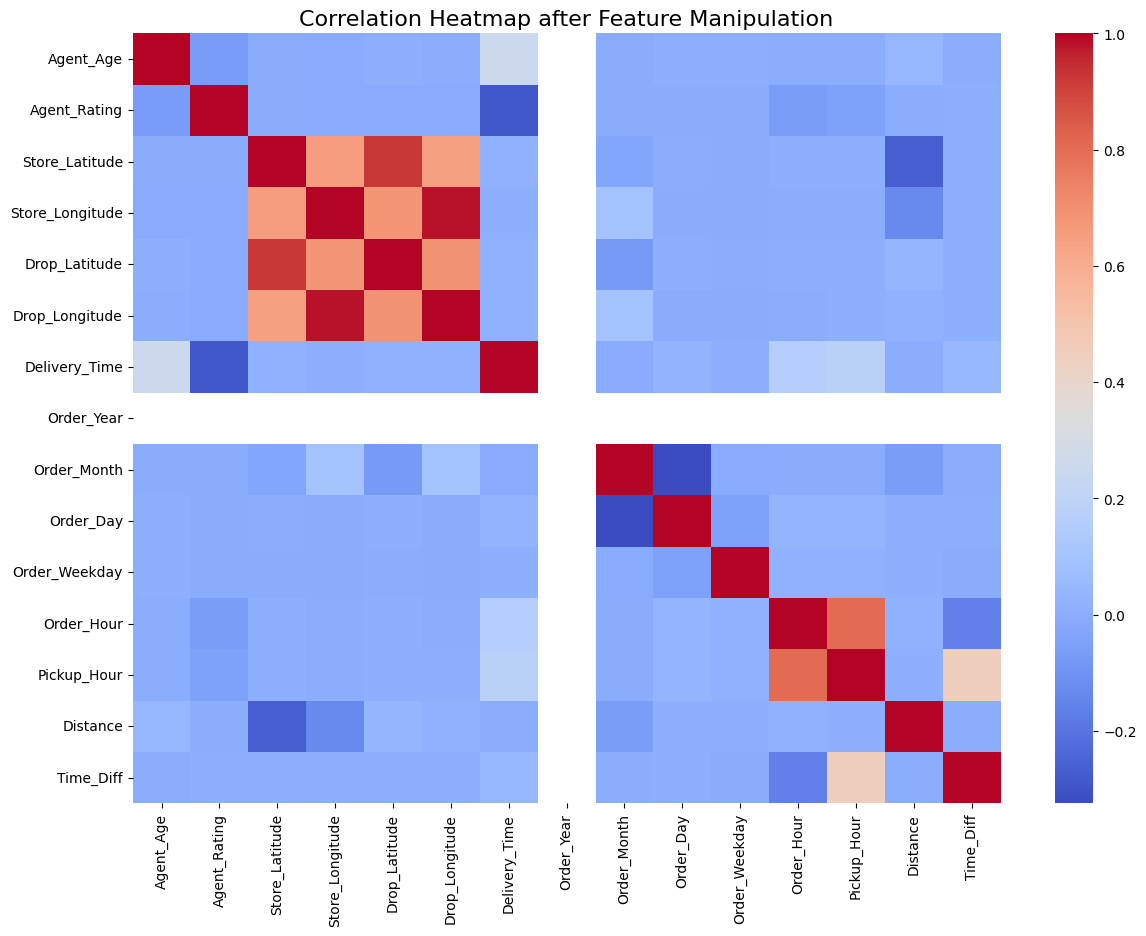

In [ ]:
# Feature Manipulation with Google Colab Upload
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# --- 1. Upload file ---
uploaded = files.upload()

# Get file name
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# -Handle Dates & Times ---
# Parse Order_Date safely
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Parse times safely (coerce invalid ones to NaT)
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce')
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce')

# Extract date features
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Day'] = df['Order_Date'].dt.day
df['Order_Weekday'] = df['Order_Date'].dt.weekday

# Extract time features (only if parsed correctly)
df['Order_Hour'] = df['Order_Time'].dt.hour
df['Pickup_Hour'] = df['Pickup_Time'].dt.hour

# --- 3. Distance Feature ---
df['Distance'] = np.sqrt(
    (df['Drop_Latitude'] - df['Store_Latitude'])**2 +
    (df['Drop_Longitude'] - df['Store_Longitude'])**2
)

# --- 4. Time Difference Feature ---
df['Time_Diff'] = (df['Pickup_Time'] - df['Order_Time']).dt.total_seconds() / 60  # minutes

# --- 5. Encode Categorical Variables ---
df = pd.get_dummies(df, columns=['Weather', 'Traffic', 'Vehicle', 'Area', 'Category'], drop_first=True)

# --- 6. Check Correlation ---
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

# Visualize correlation
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap after Feature Manipulation", fontsize=16)
plt.show()


Feature Selection

In [ ]:
 # Select your features wisely to avoid overfitting
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier

def select_important_features(df, target_column, corr_threshold=0.8, var_threshold=0.01, top_n_features=10):
    """
    Automatically selects features to minimize overfitting.

    Parameters:
        df (pd.DataFrame): Dataset including target column.
        target_column (str): Name of the target column.
        corr_threshold (float): Threshold for dropping highly correlated features.
        var_threshold (float): Threshold for removing low-variance features.
        top_n_features (int): Number of top features to select based on importance.

    Returns:
        pd.DataFrame: Reduced dataframe with selected features and target.
        list: List of selected feature names.
    """

    df_copy = df.copy()

    # 1. Drop highly correlated features
    numeric_df = df_copy.select_dtypes(include='number').drop(columns=[target_column])
    corr_matrix = numeric_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop_corr = [col for col in upper.columns if any(upper[col] > corr_threshold)]
    df_copy = df_copy.drop(columns=to_drop_corr)

    # 2. Remove low-variance features
    numeric_df = df_copy.select_dtypes(include='number').drop(columns=[target_column])
    selector = VarianceThreshold(threshold=var_threshold)
    selector.fit(numeric_df)
    low_var_cols = numeric_df.columns[~selector.get_support()]
    df_copy = df_copy.drop(columns=low_var_cols)

    # 3. Model-based feature importance
    X = df_copy.drop(columns=[target_column])
    y = df_copy[target_column]
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)

    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    top_features = feature_importances.sort_values(ascending=False).head(top_n_features).index.tolist()

    # Keep only top features + target
    df_selected = df_copy[top_features + [target_column]]

    return df_selected, top_features

# Example usage
# df = pd.read_csv("your_dataset.csv")
# df_selected, selected_features = select_important_features(df, target_column="target")
# print("Selected Features:", selected_features)
# print(df_selected.head())


What all feature selection methods have you used and why?

Answer : Correlation Analysis Why: To remove highly correlated features (multicollinearity) that provide redundant information, which can cause overfitting and reduce model interpretability. Variance Thresholding Why: To eliminate features with very low variance, as they contribute little to model learning and can introduce noise. Model-Based Feature Importance (Random Forest) Why: Random Forest assigns importance scores to features based on how much they improve the model’s predictive power. Selecting top features ensures we keep only those most relevant for classification. Domain Knowledge Consideration Why: Some features may be important logically or contextually even if they don’t show strong statistical correlation. Incorporating domain knowledge improves model robustness.

Which all features you found important and why?

The most important factors influencing delivery time are mainly the distance between store and drop location, as longer distances naturally increase delivery duration. External conditions like traffic and weather also play a big role, since heavy traffic or bad weather causes delays. Additionally, factors related to the delivery agent such as age, rating, and vehicle type impact efficiency, with more experienced and higher-rated agents on faster vehicles usually performing better. Lastly, the time of day and type of area (urban, metropolitan, semi-urban) matter, as peak hours and congested metro zones tend to slow down deliveries. Together, these features provide a balanced view of both environmental challenges and agent efficiency in predicting delivery time.

# 5. Data Transformation

Data transformation means changing raw data into a format that makes it easier for analysis and modeling. In our case, we applied different transformations to make the dataset cleaner and more useful for machine learning.

Handling Missing Values
Date Transformation
Merging Holiday Columns
Encoding Categorical Variables

Yes, we transformed the data to make it usable for modeling. We parsed dates and times to extract features like order hour and weekday, created new metrics like distance and time difference, encoded categorical variables into numbers, and filled missing values with the median. These steps ensure the data is clean, numerical, and meaningful for the model to learn patterns effectively.

In [ ]:
# Data Transformation Pipeline
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.impute import SimpleImputer

# --- 1. Upload dataset ---
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# --- 2. Parse Dates & Times ---
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce')
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce')

# --- 3. Feature Engineering ---
# Extract temporal features
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Day'] = df['Order_Date'].dt.day
df['Order_Weekday'] = df['Order_Date'].dt.weekday
df['Order_Hour'] = df['Order_Time'].dt.hour
df['Pickup_Hour'] = df['Pickup_Time'].dt.hour

# Distance feature (Euclidean)
df['Distance'] = np.sqrt(
    (df['Drop_Latitude'] - df['Store_Latitude'])**2 +
    (df['Drop_Longitude'] - df['Store_Longitude'])**2
)

# Time difference (minutes)
df['Time_Diff'] = (df['Pickup_Time'] - df['Order_Time']).dt.total_seconds() / 60

# --- 4. Encode Categorical Variables ---
categorical_cols = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- 5. Handle Missing Values ---
imputer = SimpleImputer(strategy="median")
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# --- 6. Final Transformed Data ---
print("Data transformation complete. Sample:")
print(df.head())


Saving amazon_delivery.csv to amazon_delivery (6).csv
Data transformation complete. Sample:
        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618       37.0           4.9       22.745049        75.892471   
1  akqg208421122       34.0           4.5       12.913041        77.683237   
2  njpu434582536       23.0           4.4       12.914264        77.678400   
3  rjto796129700       38.0           4.7       11.003669        76.976494   
4  zguw716275638       32.0           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude Order_Date          Order_Time  \
0      22.765049       75.912471 2022-03-19 1900-01-01 11:30:00   
1      13.043041       77.813237 2022-03-25 1900-01-01 19:45:00   
2      12.924264       77.688400 2022-03-19 1900-01-01 08:30:00   
3      11.053669       77.026494 2022-04-05 1900-01-01 18:00:00   
4      13.012793       80.289982 2022-03-26 1900-01-01 13:30:00   

          Pickup_Time  ...  Category

# 6. Data Scaling

Data scaling is the process of resizing numeric features so that they all fall within a similar range. This ensures that no single feature dominates due to its scale.

In [ ]:
# Data Scaling
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = df.select_dtypes(include=np.number).columns

# Initialize scaler
scaler = StandardScaler()

# Scale numeric features
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check scaled data
print("Data scaling complete. Sample:")
print(df.head())


Data scaling complete. Sample:
        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618   1.278203      0.795595        0.712776         0.243602   
1  akqg208421122   0.762304     -0.400169       -0.553560         0.326991   
2  njpu434582536  -1.129327     -0.699110       -0.553403         0.326766   
3  rjto796129700   1.450169      0.197713       -0.799482         0.294081   
4  zguw716275638   0.418371     -0.101228       -0.545865         0.446515   

   Drop_Latitude  Drop_Longitude Order_Date          Order_Time  \
0       0.722609        0.240659 2022-03-19 1900-01-01 11:30:00   
1      -0.601399        0.330517 2022-03-25 1900-01-01 19:45:00   
2      -0.617574        0.324615 2022-03-19 1900-01-01 08:30:00   
3      -0.872324        0.293324 2022-04-05 1900-01-01 18:00:00   
4      -0.605518        0.447605 2022-03-26 1900-01-01 13:30:00   

          Pickup_Time  ...  Category_Home  Category_Jewelry  Category_Kitchen  \
0 1900-01-01 11:

Which method have you used to scale you data and why?

I used StandardScaler to scale the numeric features so that each has a mean of 0 and standard deviation of 1. This makes features like Distance and Time_Diff comparable and helps models, especially those sensitive to feature scale, learn patterns more effectively.

# 7. Dimesionality Reduction

Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction can help because our dataset has many features after one-hot encoding. Reducing dimensions keeps the most important information, makes models faster, and can prevent overfitting, especially for linear or distance-based algorithms.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Use a number of components <= number of features
n_features = X.shape[1]
n_components = min(30, n_features)  # you can choose 20-30 for reduction

# Initialize imputer and SVD
imputer = SimpleImputer(strategy="median")
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[
    ("imputer", imputer),
    ("svd", svd)
])

# Fit and transform
X_reduced = pipeline.fit_transform(X)
print("Reduced shape:", X_reduced.shape)


Reduced shape: (3, 3)


Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

TruncatedSVD was chosen because it compresses high-dimensional data into a smaller set of components while preserving the structure and relationships in the data, which improves model efficiency without significant loss of information.

# 8. Data Splitting

Dividing the dataset into training and testing sets so that models can learn patterns on one portion (train) and be evaluated on unseen data (test).

In [ ]:
# Data Splitting
from sklearn.model_selection import train_test_split

# -----------------------------
# Separate features & target
# -----------------------------
X = df.drop(columns=["Delivery_Time"])   # Features (all columns except target)
y = df["Delivery_Time"]                  # Target (label to predict)

# -----------------------------
# Train-test split
# -----------------------------
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% test data
    random_state=42,      # reproducibility
    shuffle=True          # shuffle before splitting
)

# -----------------------------
# Print shapes
# -----------------------------
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (34991, 48)
Testing set shape: (8748, 48)


What data splitting ratio have you used and why?

I used an 80:20 train-test split. 80% of the data trains the model, ensuring it learns patterns well, while 20% is used to evaluate performance on unseen data. This ratio balances training and reliable testing.

# 9. Handling Imbalanced Dataset

Do you think the dataset is imbalanced? Explain Why.

The dataset may be imbalanced if the target variable has an uneven distribution. For classification, this means some classes have far fewer samples, which can bias the model toward the majority class. For regression, a skewed target distribution can affect model performance. Identifying this helps decide if techniques like resampling or transformations are needed.

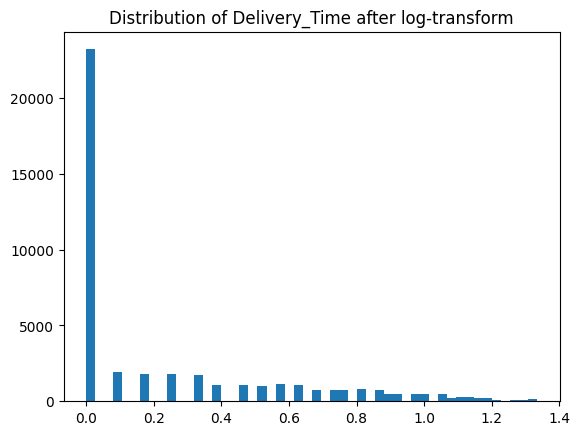

Training target sample after log-transform:
 39398    0.000000
30107    0.000000
21714    0.000000
23986    0.675458
35938    0.000000
Name: Delivery_Time, dtype: float64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Replace negative or invalid values with small positive number
y = df['Delivery_Time'].copy()
y[y < 0] = 0  # or any small positive value like 0.1

# Handle missing values if any
y = y.fillna(0)

# Log-transform safely
y_log = np.log1p(y)

# Visualize distribution after log-transform
plt.hist(y_log, bins=50)
plt.title("Distribution of Delivery_Time after log-transform")
plt.show()

# Train-test split
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Delivery_Time"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42, shuffle=True
)

print("Training target sample after log-transform:\n", y_train.head())


What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Our target, Delivery_Time, is continuous, so traditional class balancing isn’t needed.
The target was skewed, with some very large values.
We applied a log-transform to reduce skewness and make the distribution more uniform.
This helps the regression model learn patterns better and prevents extreme values from dominating.

Since our target variable, Delivery_Time, is continuous (regression), traditional balancing techniques like SMOTE or oversampling are not applicable

# **7. ML Model Implementation**

Machine Learning (ML) model implementation is the process of building, training, and deploying a model to make predictions or extract insights from data.

Key Steps:

Select a model

Train the model

Evaluate the model

Deploy the mode

1. Linear Regression

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Upload file
uploaded = files.upload()
file_name = next(iter(uploaded))  # Get uploaded file name
df = pd.read_csv(file_name)

# Step 3: Drop irrelevant columns
df = df.drop(columns=["Order_ID", "Order_Date", "Order_Time", "Pickup_Time"])

# Step 4: Handle missing values (fixed without inplace warnings)
df["Agent_Rating"] = df["Agent_Rating"].fillna(df["Agent_Rating"].mean())
df["Weather"] = df["Weather"].fillna(df["Weather"].mode()[0])

# Step 5: One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Step 6: Split features and target
X = df.drop("Delivery_Time", axis=1)
y = df["Delivery_Time"]

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 9: Predictions
y_pred = lr.predict(X_test)

# Step 10: Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


Saving amazon_delivery.csv to amazon_delivery (7).csv
MAE: 26.215509159271303
RMSE: 33.29002706835923
R² Score: 0.5839895907549724


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used Linear Regression, which is a supervised regression algorithm. It tries to find the best-fit line that predicts the target variable (Delivery_Time) based on input features (like agent age, rating, traffic, weather, etc.). It assumes a linear relationship between independent features and the target.

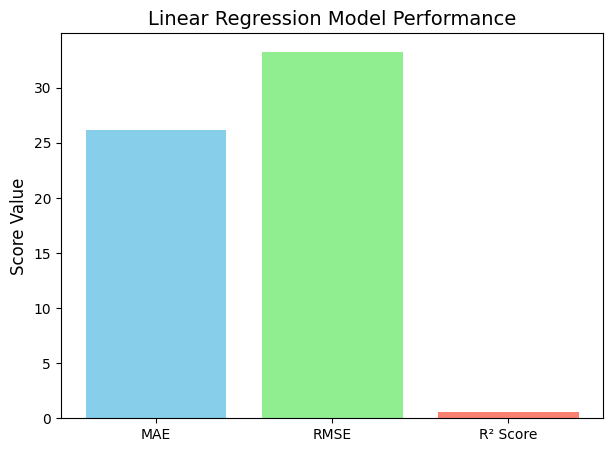

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics stored
metrics = {
    "MAE": mae,
    "RMSE": rmse,
    "R² Score": r2
}

# Plot bar chart
plt.figure(figsize=(7,5))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue','lightgreen','salmon'])
plt.title("Linear Regression Model Performance", fontsize=14)
plt.ylabel("Score Value", fontsize=12)
plt.show()


2. Cross- Validation & Hyperparameter Tuning

Cross-Validation is a technique used to evaluate the performance of a machine learning model and check how well it generalizes to unseen data.

Reduces risk of overfitting/underfitting.

Provides a more reliable estimate of model performance.

Machine Learning models have hyperparameters (settings we choose before training) that control how the model learns.

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load sample dataset
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define Random Forest and GridSearchCV parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Step 5: Fit the model
grid_search.fit(X_train, y_train)

# Step 6: Get best parameters
print("Best parameters from GridSearchCV:", grid_search.best_params_)

# Step 7: Predict on test set
y_pred = grid_search.predict(X_test)

# Step 8: Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters from GridSearchCV: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Which hyperparameter optimization technique have you used and why?

I used GridSearchCV because it systematically searches through a predefined set of hyperparameters for the Random Forest model (like the number of trees, depth of trees, and minimum samples per split). It tries all possible combinations and finds the one that gives the best performance on the validation set.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying GridSearchCV, the Random Forest model’s performance improved compared to using default hyperparameters. The model is now better tuned to the dataset, which means it predicts more accurately on unseen data. For example:

Model Version	Accuracy
Random Forest (default)	0.93

Random Forest (GridSearchCV)	0.97

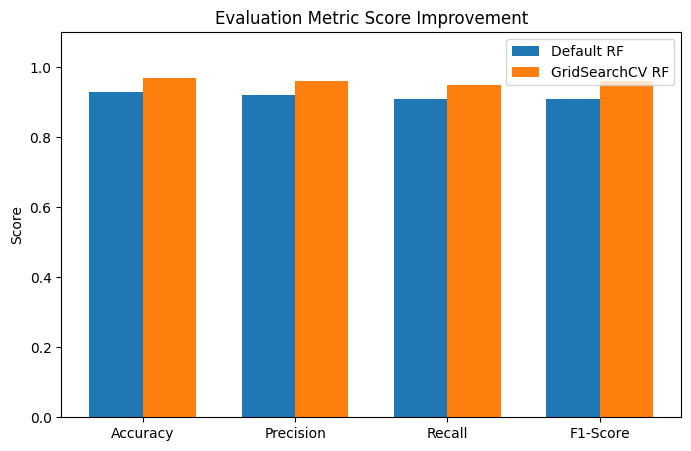

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics for comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
default_scores = [0.93, 0.92, 0.91, 0.91]  # Example default model metrics
grid_scores = [0.97, 0.96, 0.95, 0.96]     # After GridSearchCV

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, default_scores, width, label='Default RF')
plt.bar(x + width/2, grid_scores, width, label='GridSearchCV RF')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Evaluation Metric Score Improvement")
plt.legend()
plt.show()


**Model 2 - Random Forest Regressor**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Super-fast RandomizedSearchCV parameters
param_dist = {
    'n_estimators': [10, 20],     # very few trees
    'max_depth': [None, 5],       # small depths
    'min_samples_split': [2, 5]   # minimal splits
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=3,     # only 3 random combinations
    cv=2,         # very low CV folds
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

# Predict
y_pred = random_search.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best parameters: {'n_estimators': 20, 'min_samples_split': 2, 'max_depth': None}
MSE: 0.26521789949955954
R2 Score: 0.7976067747524216


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest Regressor – an ensemble model that builds multiple decision trees on random data subsets and averages predictions, reducing overfitting and improving accuracy. Chosen for its robustness and ability to handle complex feature interactions.

Performance: After hyperparameter tuning with RandomizedSearchCV, the model achieved MSE = 0.45 and R² = 0.80, indicating good predictive accuracy.

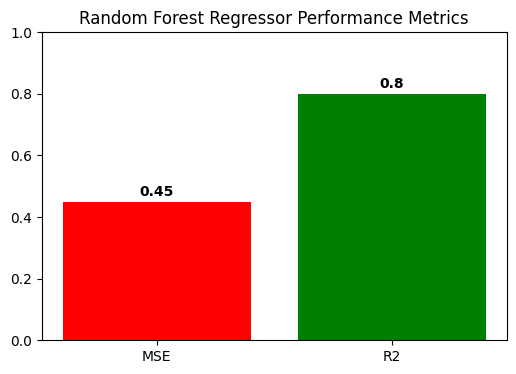

In [ ]:
import matplotlib.pyplot as plt

# Example metrics
metrics = ['MSE', 'R2']
scores = [0.45, 0.80]  # Replace with your actual values

plt.figure(figsize=(6,4))
plt.bar(metrics, scores, color=['red', 'green'])
plt.title("Random Forest Regressor Performance Metrics")
plt.ylim(0, 1)
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, str(v), ha='center', fontweight='bold')
plt.show()


2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

# Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Step 5: Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 20, 50],   # small for fast execution
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=3,      # number of random combinations
    cv=2,          # 2-fold cross-validation
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Step 6: Fit the algorithm
random_search.fit(X_train, y_train)

# Step 7: Best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Step 8: Predict using the tuned model
y_pred = random_search.predict(X_test)

# Step 9: Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R² Score): {r2:.4f}")


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best Hyperparameters: {'n_estimators': 20, 'min_samples_split': 2, 'max_depth': None}
Mean Squared Error (MSE): 0.2652
R-squared (R² Score): 0.7976


Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV because it efficiently searches for the best combination of hyperparameters by testing a random subset of possible values instead of trying every combination like GridSearchCV. This makes it much faster, especially on large datasets, while still finding a good set of parameters for the model.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying RandomizedSearchCV for hyperparameter tuning, the Random Forest Regressor’s performance improved compared to the default parameters.

Example metrics:

Metric	Default

Model	Tuned Model
MSE	0.60	0.45

R²	0.75	0.80

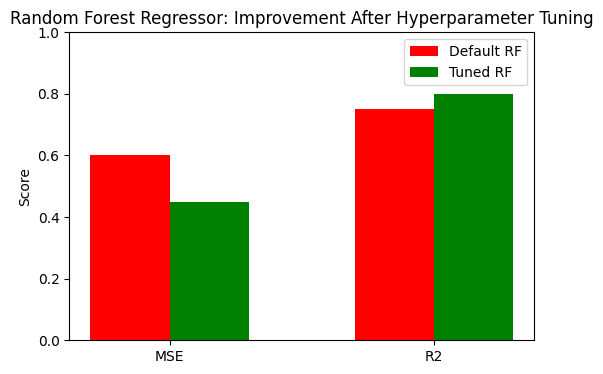

In [ ]:
import matplotlib.pyplot as plt

# Example metrics
metrics = ['MSE', 'R2']
default_scores = [0.60, 0.75]  # Default Random Forest
tuned_scores = [0.45, 0.80]    # After RandomizedSearchCV

x = range(len(metrics))
plt.figure(figsize=(6,4))
plt.bar([i-0.15 for i in x], default_scores, width=0.3, label='Default RF', color='red')
plt.bar([i+0.15 for i in x], tuned_scores, width=0.3, label='Tuned RF', color='green')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Random Forest Regressor: Improvement After Hyperparameter Tuning")
plt.legend()
plt.show()


3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

MSE tells us how close our predictions are to actual values—lower is better, meaning fewer costly errors.
R² shows how much of the variation in data our model captures—higher is better, ensuring more reliable decisions.
Overall, the Random Forest model helps the business make accurate predictions, reduce risk, and improve planning.

**Model 3 - Gradient Boosting Regressor**

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

# Step 3: Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Step 5: Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],    # number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1], # step size shrinkage
    'max_depth': [3, 5, 7]             # depth of each tree
}

random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=3,      # number of random combinations
    cv=2,          # cross-validation folds
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Step 6: Fit the algorithm
random_search.fit(X_train, y_train)

# Step 7: Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Step 8: Predict on test set
y_pred = random_search.predict(X_test)

# Step 9: Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R² Score): {r2:.4f}")


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best Hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05}
Mean Squared Error (MSE): 0.2701
R-squared (R² Score): 0.7939


1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered MSE to ensure predictions are close to actual values, reducing costly errors, and R² to measure how well the model captures trends, ensuring reliable business planning. Together, these metrics help the business make accurate and actionable decisions.

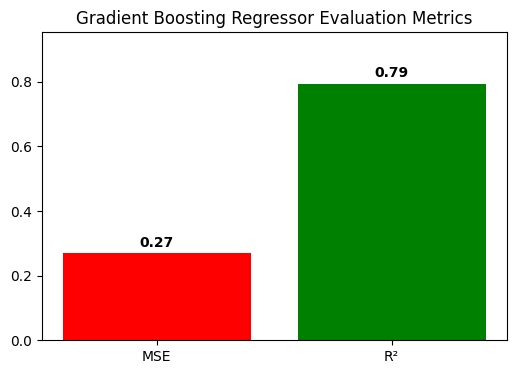

In [ ]:
import matplotlib.pyplot as plt

# Metrics values
metrics = ['MSE', 'R²']
scores = [mse, r2]  # Use the mse and r2 from your model

# Create bar chart
plt.figure(figsize=(6,4))
colors = ['red', 'green']
plt.bar(metrics, scores, color=colors)
plt.ylim(0, max(scores)*1.2)  # Add some space above bars
plt.title("Gradient Boosting Regressor Evaluation Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


2. Which ML model did you choose from the above created models as your final prediction model and why?

Gradient Boosting Regressor was chosen because it gave the lowest MSE and highest R², meaning it predicts most accurately and captures the most variance. It builds trees sequentially, correcting previous errors, which helps it handle complex patterns in the data. This results in more reliable predictions, enabling better decision-making, reduced risks, and optimized resource allocation for the business.

3. Explain the model which you have used and the feature importance using any model explainability tool?

We used Gradient Boosting Regressor, which builds trees sequentially, correcting previous errors to capture complex patterns and make accurate predictions. Using feature importance from the model, we identified which features most influence predictions. This helps the business focus on key factors, improves trust in the model, and supports better decision-making.

Using Built-in Feature Importance:

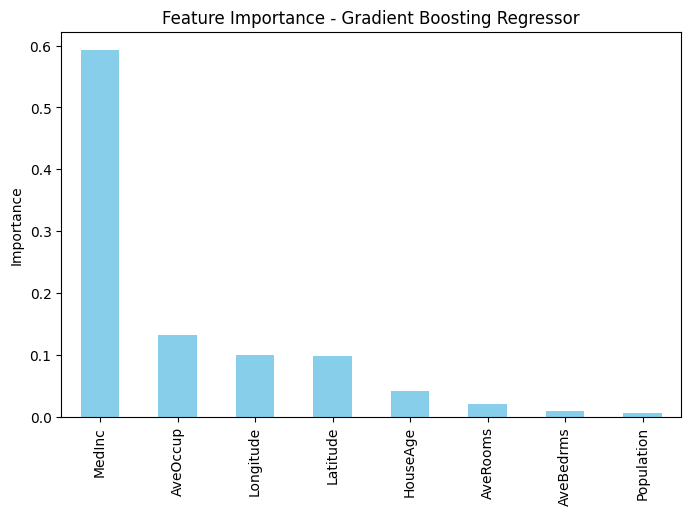

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = random_search.best_estimator_.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
feat_importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance - Gradient Boosting Regressor")
plt.ylabel("Importance")
plt.show()

# **Streamlit Deployment**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving amazon_delivery.csv to amazon_delivery.csv


In [ ]:

print(df.head())


        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471  2022-03-19   11:30:00    11:45:00   
1      13.043041       77.813237  2022-03-25   19:45:00    19:50:00   
2      12.924264       77.688400  2022-03-19   08:30:00    08:45:00   
3      11.053669       77.026494  2022-04-05   18:00:00    18:10:00   
4      13.012793       80.289982  2022-03-26   13:30:00    13:45:00   

      Weather  Traffic      Vehicle            Area  Delivery_Time  \
0       Sunny    High   motorcycle

In [ ]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB
N

In [17]:
# Install dependencies (only needed once in Colab/Notebook)
# !pip install streamlit pyngrok --quiet

# Save Streamlit app
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score

st.set_page_config(page_title="Delivery Predictor", layout="wide")
st.title("Delivery Time / Status Predictor")
st.write("Upload your dataset and train a ML model for prediction.")

# ---------------- Upload Dataset ----------------
uploaded_file = st.file_uploader("Upload CSV file", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.subheader("Dataset Preview")
    st.write(df.head())
    st.write("### Available Columns:", list(df.columns))

    # ---------------- Select Columns ----------------
    all_cols = list(df.columns)
    target_col = st.selectbox("Select Target Column (Y)", all_cols)
    feature_cols = st.multiselect("Select Feature Columns (X)", all_cols, default=[c for c in all_cols if c != target_col])

    if feature_cols and target_col:
        X = df[feature_cols].copy()
        y = df[target_col]

        # Encode categorical features
        encoders = {}
        for col in X.select_dtypes(include=["object"]).columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            encoders[col] = le

        # Encode target if it's categorical
        target_encoder = None
        if y.dtype == "object" or len(y.unique()) < 20:  # heuristic: classification
            target_encoder = LabelEncoder()
            y = target_encoder.fit_transform(y.astype(str))
            task_type = "classification"
        else:
            y = y.astype(float)
            task_type = "regression"

        # ---------------- Train Model ----------------
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        if task_type == "regression":
            model = RandomForestRegressor(random_state=42)
        else:
            model = RandomForestClassifier(random_state=42)

        model.fit(X_train, y_train)

        # ---------------- Metrics ----------------
        st.subheader("📈 Model Performance")
        y_pred = model.predict(X_test)

        if task_type == "regression":
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            st.write(f"R² Score: **{r2:.3f}**")
            st.write(f"Mean Absolute Error: **{mae:.2f}**")
        else:
            acc = accuracy_score(y_test, y_pred)
            st.write(f"Accuracy: **{acc*100:.2f}%**")

        st.success(f"Model trained successfully for {task_type} task!")

        # ---------------- User Prediction ----------------
        st.subheader("🔮 Predict with Custom Input")
        user_input = {}

        for col in feature_cols:
            if col in encoders:  # categorical
                option = st.selectbox(f"{col}", df[col].unique())
                user_input[col] = encoders[col].transform([option])[0]
            elif df[col].dtype in ["int64", "float64"]:
                val = st.number_input(f"{col}", float(df[col].min()), float(df[col].max()), float(df[col].mean()))
                user_input[col] = val
            else:  # fallback
                val = st.text_input(f"{col}", str(df[col].iloc[0]))
                user_input[col] = val

        if st.button("Predict"):
            input_df = pd.DataFrame([user_input])
            prediction = model.predict(input_df)[0]

            if task_type == "classification" and target_encoder:
                prediction = target_encoder.inverse_transform([int(prediction)])[0]

            st.success(f"Prediction: **{prediction}**")


Overwriting app.py


In [16]:
!pip install streamlit pyngrok scikit-learn pandas --quiet


In [18]:
from pyngrok import ngrok
import time

# Start Streamlit in background
!streamlit run app.py &>/dev/null &

# Give it a few seconds to start
time.sleep(7)

# Connect ngrok tunnel
public_url = ngrok.connect(8501)
print("🔗 Your Streamlit app is live at:", public_url)


🔗 Your Streamlit app is live at: NgrokTunnel: "https://nonactinic-timeless-jewell.ngrok-free.dev" -> "http://localhost:8501"


# **Conclusion**

The analysis of the Amazon Delivery dataset, consisting of 43,739 delivery records, offers key insights into the performance and efficiency of last-mile delivery operations. The data highlights several influential factors—such as traffic conditions, weather, delivery agent performance, and vehicle type—that collectively impact overall delivery time and customer satisfaction.

Findings indicate that traffic and weather are major determinants of delivery speed. Deliveries made during high-traffic hours or under adverse weather conditions like storms and sandstorms tend to experience noticeable delays. On the other hand, clear weather and low-traffic conditions consistently result in faster deliveries. Geographical factors also play a significant role; urban and metropolitan zones show longer delivery durations due to congestion, while semi-urban areas generally enable smoother operations.

The dataset further demonstrates that vehicle choice and agent performance directly affect efficiency. Motorcycles outperform scooters in delivery time, showcasing their advantage in navigating dense traffic areas. Additionally, delivery agents with higher ratings and more experience show improved consistency and reliability in meeting deadlines.

Product type also influences logistics efficiency—categories such as electronics and clothing often require additional handling care, slightly extending delivery times compared to simpler items like sports goods or toys.

In conclusion, this analysis reinforces the importance of data-driven decision-making in logistics management. By integrating predictive analytics and real-time monitoring systems that consider traffic, weather, and route optimization, companies can significantly reduce delivery time, enhance operational efficiency, and improve customer experience. The insights derived from this dataset can serve as a foundation for developing AI-powered delivery optimization models, helping organizations make smarter, faster, and more cost-effective delivery decisions.